In [1]:
# Read into a dataframe a CSV dataset with 10 example offices 
# described by 5 features (4 descriptive features: Size, Floor, BroadbandRate, EnergyRating;
# the target feature: RentalPrice).

# Library Imports.
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Allows plots to appear directly in the notebook.
%matplotlib inline

from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

In [2]:
# Read a CSV dataset with 10 example offices into a dataframe.
# The data is described by 5 features (4 descriptive features: Size, Floor, BroadbandRate, EnergyRating;
# the target feature: RentalPrice).


# Read csv file into a dataframe.
df = pd.read_csv('CreditRisk_Clean_1-3_NewFeatures.csv')
df.head(10)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,percent,DelqEver,DelqLast12M,PercentSatisfactoryTrades,NumTradesWBalance
0,Bad,61,246,20,95,18,2,2,86,11,...,NaN,5,1,2,88,0.490196,True,True,86.0,18
1,Good,72,156,2,53,16,2,0,89,50,...,50.0,2,2,1,44,0.160000,True,False,67.0,10
2,Bad,73,132,9,47,4,0,0,100,122,...,NaN,1,1,1,100,0.160000,False,False,100.0,4
3,Good,62,21,12,17,4,0,0,100,122,...,83.0,1,2,1,75,0.160000,False,False,100.0,3
4,Good,85,320,17,104,18,0,0,94,46,...,75.0,1,2,0,27,0.160000,True,False,39.0,12
5,Good,89,150,19,69,12,0,0,100,122,...,55.0,1,2,0,43,0.160000,False,False,100.0,5
6,Good,86,337,1,102,21,0,0,100,122,...,100.0,2,4,0,50,0.160000,False,False,95.0,11
7,Good,67,160,4,49,27,0,0,97,48,...,76.0,5,2,0,70,0.160000,True,False,93.0,20
8,Bad,70,184,11,36,7,0,0,88,20,...,100.0,1,2,0,75,0.160000,True,False,78.0,6
9,Bad,74,172,0,82,14,0,0,81,5,...,NaN,2,1,0,43,0.490196,True,True,88.0,6


In [3]:
# find out how many rows to calculate percentages when creating trainning and testing datasets
len(df.index)

827

# (1.1) Randomly shuffle the rows of dataset and split the dataset into two datasets: 70% training and 30% test. Keep the test set aside.

In [ ]:
# Random shuffling of the rows in the data frame - so as to be fair in our selection of the trainning and test data

df = df.reindex(np.random.permutation(df.index))
df.head(10)

In [ ]:
# create variable to obtain what the 70% of the data set is
seventy_percent = round(len(df.index)/100*70)

# Create dataframe with the first 70% of the data and show the first 10 rows - this dataframe will be the trainning data
df_train = df[0:seventy_percent]
df_train.head(10)

In [ ]:
# double check that it is infact 70 percent
print(len(df_train.index) == seventy_percent)
print(len(df_train.index))

In [ ]:
# Create df_test as the remaining 30% of the data frame to apply the testing of the model

df_test = df[seventy_percent:]
print(len(df_test))
df_test.head(10)

In [ ]:
# Ensure that the two dataframes created are indeed 70% and 30% and add up to the total of rows
# 100% of the dataframe was 937 rows - above shows 656 rows for the 70% df and 281 rows for the 30% df totaling 937 rows
# or 100%

print((seventy_percent) + round(len(df.index)/100*30))
print(len(df_test) + len(df_train))

In [ ]:
# Write the training and test dataframe to individual csv files to ensure data continuity
df_train.to_csv('Train.csv', index=False)
df_test.to_csv('Test.csv', index=False)

# - (1.2) On the training set:
## - Plot the correlations between all the continuous features. Discuss what you see in these plots.

In [4]:
# Read Training data frame from csv file into a dataframe.
df_train = pd.read_csv('Train.csv')

In [5]:
# Check which are the continuous features
df_train.dtypes

RiskPerformance                        object
ExternalRiskEstimate                    int64
MSinceOldestTradeOpen                   int64
MSinceMostRecentTradeOpen               int64
AverageMInFile                          int64
NumSatisfactoryTrades                   int64
NumTrades60Ever2DerogPubRec             int64
NumTrades90Ever2DerogPubRec             int64
PercentTradesNeverDelq                  int64
MSinceMostRecentDelq                    int64
MaxDelq2PublicRecLast12M                int64
MaxDelqEver                             int64
NumTotalTrades                          int64
NumTradesOpeninLast12M                  int64
PercentInstallTrades                    int64
MSinceMostRecentInqexcl7days            int64
NumInqLast6M                            int64
NumInqLast6Mexcl7days                   int64
NetFractionRevolvingBurden              int64
NetFractionInstallBurden              float64
NumRevolvingTradesWBalance              int64
NumInstallTradesWBalance          

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]), <a list of 24 Text xticklabel objects>)

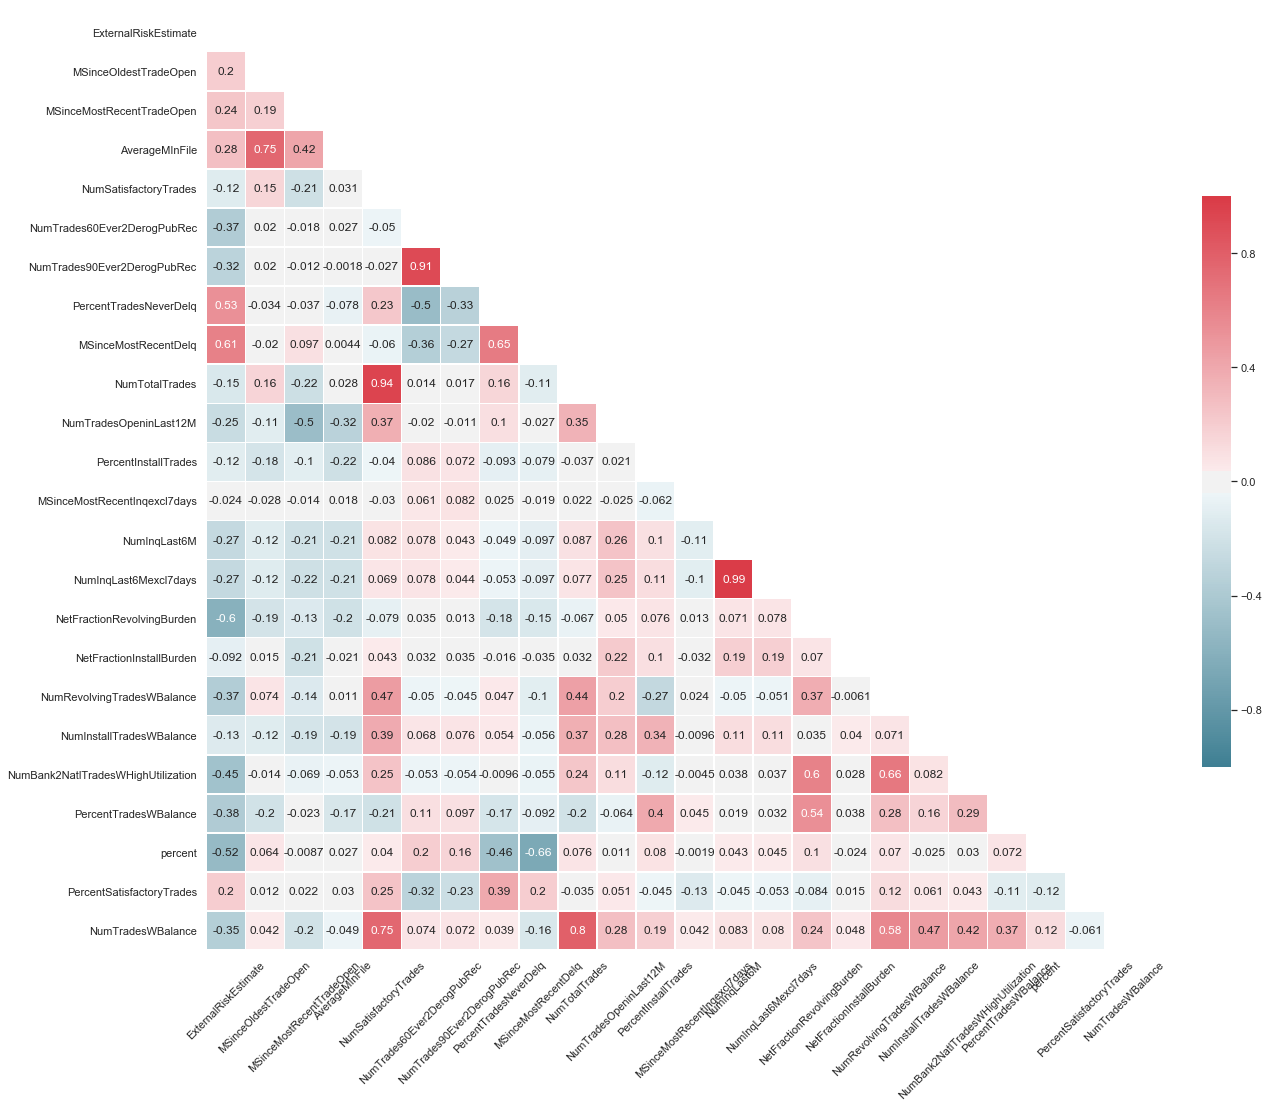

In [6]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Change to category as even though built with numerical values the numerical values have category meanings
df_train['MaxDelq2PublicRecLast12M'] = df_train['MaxDelq2PublicRecLast12M'].astype('category')
df_train['MaxDelqEver'] = df_train['MaxDelqEver'].astype('category')


# Select columns containing continuous data
df_continuous_columns = df_train.select_dtypes(include=['int64', 'float64'])

# # Drop MaxDelq2PublicRecLast12M and MaxDelqEver as eventhough of numerical nature each number is a meaning therefore 
# # the features are categorical
# df_continuous_columns = df_continuous_columns.drop('MaxDelq2PublicRecLast12M', 1)
# df_continuous_columns = df_continuous_columns.drop('MaxDelqEver', 1)

# Calculate correlation of all pairs of continuous features
corr = df_continuous_columns.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 21))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)



- A scatter plot matrix was attempted in order to map the correlation between all the continous features. 

- TA tanh has advised that a heat map should be obtained from all the continuous features to show correlation between all the features and from the heatmap the ones with the biggest correlations should be charted with an individual scatter plott as creating a scatter plot matrix was not displaying correctly in jupyter notebooks due to the sheer amount of them.

- Same issue though in a much reduced manner compared to the scatter plot matrix occurrs with the heatmap. It is appreciated that the feature labels in the x-axis are not properly aligned.  

In [7]:
# Additionally Look at correlations for all the continuous features in table form.
df_continuous_columns.corr()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,NumTotalTrades,...,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,percent,PercentSatisfactoryTrades,NumTradesWBalance
ExternalRiskEstimate,1.000000,0.196782,0.236446,0.279609,-0.121032,-0.373562,-0.316626,0.530504,0.612237,-0.153316,...,-0.268353,-0.600403,-0.091937,-0.365357,-0.127965,-0.453883,-0.380573,-0.516583,0.202179,-0.352906
MSinceOldestTradeOpen,0.196782,1.000000,0.194159,0.752974,0.151611,0.020352,0.020493,-0.034120,-0.020069,0.163266,...,-0.119984,-0.191060,0.014678,0.073988,-0.118029,-0.014335,-0.198050,0.063715,0.012134,0.041765
MSinceMostRecentTradeOpen,0.236446,0.194159,1.000000,0.417623,-0.214810,-0.017826,-0.012249,-0.036737,0.096935,-0.219405,...,-0.215707,-0.133272,-0.206419,-0.138679,-0.186618,-0.068789,-0.023083,-0.008718,0.022324,-0.197459
AverageMInFile,0.279609,0.752974,0.417623,1.000000,0.031365,0.027131,-0.001803,-0.077955,0.004406,0.027703,...,-0.205198,-0.204599,-0.020601,0.010890,-0.190941,-0.052637,-0.169379,0.026548,0.029519,-0.049307
NumSatisfactoryTrades,-0.121032,0.151611,-0.214810,0.031365,1.000000,-0.050401,-0.026503,0.233864,-0.060186,0.944821,...,0.068866,-0.078578,0.042941,0.467577,0.385830,0.250847,-0.206417,0.040007,0.253213,0.750792
NumTrades60Ever2DerogPubRec,-0.373562,0.020352,-0.017826,0.027131,-0.050401,1.000000,0.913639,-0.504636,-0.356685,0.013688,...,0.077924,0.034841,0.031930,-0.050235,0.067752,-0.052750,0.106413,0.197763,-0.315300,0.074376
NumTrades90Ever2DerogPubRec,-0.316626,0.020493,-0.012249,-0.001803,-0.026503,0.913639,1.000000,-0.329950,-0.271735,0.016752,...,0.043608,0.012752,0.034740,-0.045454,0.076285,-0.054360,0.096667,0.159451,-0.230921,0.071813
PercentTradesNeverDelq,0.530504,-0.034120,-0.036737,-0.077955,0.233864,-0.504636,-0.329950,1.000000,0.646313,0.155271,...,-0.053204,-0.183481,-0.016150,0.047346,0.054085,-0.009646,-0.172069,-0.462965,0.394939,0.039363
MSinceMostRecentDelq,0.612237,-0.020069,0.096935,0.004406,-0.060186,-0.356685,-0.271735,0.646313,1.000000,-0.113220,...,-0.096667,-0.150964,-0.035231,-0.103977,-0.056187,-0.055329,-0.091929,-0.657966,0.199427,-0.161519
NumTotalTrades,-0.153316,0.163266,-0.219405,0.027703,0.944821,0.013688,0.016752,0.155271,-0.113220,1.000000,...,0.076575,-0.066849,0.031621,0.439453,0.365133,0.239227,-0.197710,0.076289,-0.034643,0.796304


### Select only the features that have a correlation of 0.5 and more but not the ones that are the same and from -0.5 to -1

- If any of the column has no correlation of (0.5 or more) or (-0.5 or less) drop the column

- We select the correlation features that are over 0.50 as according to https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/ coefficients of .50 and above represent a large association or relationship while correlation coefficients between .10 and .29 represent a small association, coefficients between .30 and .49 represent a medium association. **Essentially we are looking for strong correlation only**. Same for negative correlation.

In [8]:
# We select the correlation features that are over 0.50 to 1 and from -0.5 to -1

relevant_features = corr[((corr > 0.5) & (corr < 1)) | ((corr < -0.5) & (corr > -1))]
relevant_features

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,NumTotalTrades,...,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,percent,PercentSatisfactoryTrades,NumTradesWBalance
ExternalRiskEstimate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.530504,0.612237,NaN,...,NaN,-0.600403,NaN,NaN,NaN,NaN,NaN,-0.516583,NaN,NaN
MSinceOldestTradeOpen,NaN,NaN,NaN,0.752974,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSinceMostRecentTradeOpen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageMInFile,NaN,0.752974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumSatisfactoryTrades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750792
NumTrades60Ever2DerogPubRec,NaN,NaN,NaN,NaN,NaN,NaN,0.913639,-0.504636,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumTrades90Ever2DerogPubRec,NaN,NaN,NaN,NaN,NaN,0.913639,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PercentTradesNeverDelq,0.530504,NaN,NaN,NaN,NaN,-0.504636,NaN,NaN,0.646313,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSinceMostRecentDelq,0.612237,NaN,NaN,NaN,NaN,NaN,NaN,0.646313,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.657966,NaN,NaN
NumTotalTrades,NaN,NaN,NaN,NaN,0.944821,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.796304


In [9]:
relevant_features[relevant_features[relevant_features.columns[0]].isna()==False][relevant_features.columns[0]]

PercentTradesNeverDelq        0.530504
MSinceMostRecentDelq          0.612237
NetFractionRevolvingBurden   -0.600403
percent                      -0.516583
Name: ExternalRiskEstimate, dtype: float64

In [10]:
# Select the features with the highest correlation
remove = []

for i in range(0,len(relevant_features.columns)):
    print("Feature is: ", relevant_features.columns[i])
    print(relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]])
    
    col = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==True][relevant_features.columns[i]]
    if col.size == 24:
        remove.append(relevant_features.columns[i])
        print("to be Removed: ", relevant_features.columns[i])
    print("\n" * 2)
    
# print(remove)

for i, k in enumerate(remove):
    relevant_features = relevant_features.drop(k, 1)
    relevant_features = relevant_features.drop(k, 0)

print("remove.lenght is: ", len(remove))   
print("Columns are: ", relevant_features.columns)
print("Size is: ", relevant_features.columns.size)
    

Feature is:  ExternalRiskEstimate
PercentTradesNeverDelq        0.530504
MSinceMostRecentDelq          0.612237
NetFractionRevolvingBurden   -0.600403
percent                      -0.516583
Name: ExternalRiskEstimate, dtype: float64



Feature is:  MSinceOldestTradeOpen
AverageMInFile    0.752974
Name: MSinceOldestTradeOpen, dtype: float64



Feature is:  MSinceMostRecentTradeOpen
Series([], Name: MSinceMostRecentTradeOpen, dtype: float64)
to be Removed:  MSinceMostRecentTradeOpen



Feature is:  AverageMInFile
MSinceOldestTradeOpen    0.752974
Name: AverageMInFile, dtype: float64



Feature is:  NumSatisfactoryTrades
NumTotalTrades       0.944821
NumTradesWBalance    0.750792
Name: NumSatisfactoryTrades, dtype: float64



Feature is:  NumTrades60Ever2DerogPubRec
NumTrades90Ever2DerogPubRec    0.913639
PercentTradesNeverDelq        -0.504636
Name: NumTrades60Ever2DerogPubRec, dtype: float64



Feature is:  NumTrades90Ever2DerogPubRec
NumTrades60Ever2DerogPubRec    0.913639
Name: NumTra

In [11]:
relevant_features

,ExternalRiskEstimate,MSinceOldestTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,NumTotalTrades,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NumRevolvingTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,percent,NumTradesWBalance
ExternalRiskEstimate,NaN,NaN,NaN,NaN,NaN,NaN,0.530504,0.612237,NaN,NaN,NaN,-0.600403,NaN,NaN,NaN,-0.516583,NaN
MSinceOldestTradeOpen,NaN,NaN,0.752974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageMInFile,NaN,0.752974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumSatisfactoryTrades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750792
NumTrades60Ever2DerogPubRec,NaN,NaN,NaN,NaN,NaN,0.913639,-0.504636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumTrades90Ever2DerogPubRec,NaN,NaN,NaN,NaN,0.913639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PercentTradesNeverDelq,0.530504,NaN,NaN,NaN,-0.504636,NaN,NaN,0.646313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSinceMostRecentDelq,0.612237,NaN,NaN,NaN,NaN,NaN,0.646313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.657966,NaN
NumTotalTrades,NaN,NaN,NaN,0.944821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.796304
NumInqLast6M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99172,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
needed = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]].index
needed

Index(['ExternalRiskEstimate', 'NumTrades60Ever2DerogPubRec',
       'MSinceMostRecentDelq'],
      dtype='object')

In [13]:
values = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]].values
values

array([ 0.53050421, -0.50463576,  0.64631346])

In [14]:
col_size = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]].size
col_size

3

### Draw up Scatter Plots

C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or 

FEATURE IS:  ExternalRiskEstimate
Needs to correlate with:  Index(['PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'NetFractionRevolvingBurden', 'percent'],
      dtype='object')

Create correlation between: 
x is:  ExternalRiskEstimate
y is:  PercentTradesNeverDelq
value is:  0.5305042055998912

x is:  ExternalRiskEstimate
y is:  MSinceMostRecentDelq
value is:  0.6122368610689398

x is:  ExternalRiskEstimate
y is:  NetFractionRevolvingBurden
value is:  -0.6004034176546652

x is:  ExternalRiskEstimate
y is:  percent
value is:  -0.5165825508311973




x-----------------------------------------------------------------x
FEATURE IS:  MSinceOldestTradeOpen
Needs to correlate with:  Index(['AverageMInFile'], dtype='object')

Create correlation between: 
x is:  MSinceOldestTradeOpen
y is:  AverageMInFile
value is:  0.7529735258768895




x-----------------------------------------------------------------x
FEATURE IS:  AverageMInFile
Needs to correlate with:  Index(['MSinceOldestTradeO

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches


x is:  NumSatisfactoryTrades
y is:  NumTradesWBalance
value is:  0.7507922844851392




x-----------------------------------------------------------------x
FEATURE IS:  NumTrades60Ever2DerogPubRec
Needs to correlate with:  Index(['NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq'], dtype='object')

Create correlation between: 
x is:  NumTrades60Ever2DerogPubRec
y is:  NumTrades90Ever2DerogPubRec
value is:  0.9136393257433438

x is:  NumTrades60Ever2DerogPubRec
y is:  PercentTradesNeverDelq
value is:  -0.5046357581767601




x-----------------------------------------------------------------x
FEATURE IS:  NumTrades90Ever2DerogPubRec
Needs to correlate with:  Index(['NumTrades60Ever2DerogPubRec'], dtype='object')

Create correlation between: 
Pair already checked!




x-----------------------------------------------------------------x
FEATURE IS:  PercentTradesNeverDelq
Needs to correlate with:  Index(['ExternalRiskEstimate', 'NumTrades60Ever2DerogPubRec',
       'MSinceMostRecentDe

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches





x-----------------------------------------------------------------x
FEATURE IS:  NumInqLast6M
Needs to correlate with:  Index(['NumInqLast6Mexcl7days'], dtype='object')

Create correlation between: 
x is:  NumInqLast6M
y is:  NumInqLast6Mexcl7days
value is:  0.991720499943012




x-----------------------------------------------------------------x
FEATURE IS:  NumInqLast6Mexcl7days
Needs to correlate with:  Index(['NumInqLast6M'], dtype='object')

Create correlation between: 
Pair already checked!




x-----------------------------------------------------------------x
FEATURE IS:  NetFractionRevolvingBurden
Needs to correlate with:  Index(['ExternalRiskEstimate', 'NumBank2NatlTradesWHighUtilization',
       'PercentTradesWBalance'],
      dtype='object')

Create correlation between: 
Pair already checked!

x is:  NetFractionRevolvingBurden
y is:  NumBank2NatlTradesWHighUtilization
value is:  0.6042555227905054

x is:  NetFractionRevolvingBurden
y is:  PercentTradesWBalance
value is:

[('PercentTradesNeverDelq', 'ExternalRiskEstimate', 0.5305042055998912),
 ('MSinceMostRecentDelq', 'ExternalRiskEstimate', 0.6122368610689398),
 ('NetFractionRevolvingBurden', 'ExternalRiskEstimate', -0.6004034176546652),
 ('percent', 'ExternalRiskEstimate', -0.5165825508311973),
 ('AverageMInFile', 'MSinceOldestTradeOpen', 0.7529735258768895),
 ('NumTotalTrades', 'NumSatisfactoryTrades', 0.9448209123156396),
 ('NumTradesWBalance', 'NumSatisfactoryTrades', 0.7507922844851392),
 ('NumTrades90Ever2DerogPubRec',
  'NumTrades60Ever2DerogPubRec',
  0.9136393257433438),
 ('PercentTradesNeverDelq',
  'NumTrades60Ever2DerogPubRec',
  -0.5046357581767601),
 ('MSinceMostRecentDelq', 'PercentTradesNeverDelq', 0.6463134629009658),
 ('percent', 'MSinceMostRecentDelq', -0.6579660434773489),
 ('NumTradesWBalance', 'NumTotalTrades', 0.7963039419022324),
 ('NumInqLast6Mexcl7days', 'NumInqLast6M', 0.991720499943012),
 ('NumBank2NatlTradesWHighUtilization',
  'NetFractionRevolvingBurden',
  0.60425552279

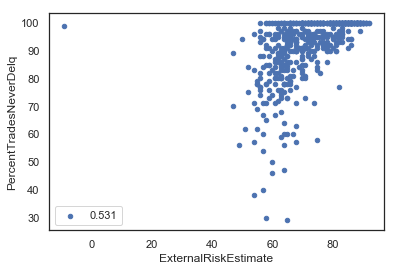

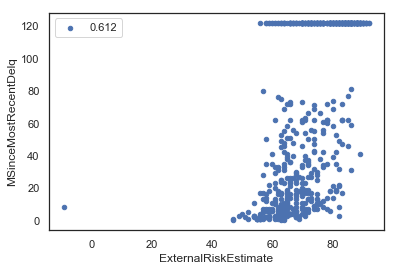

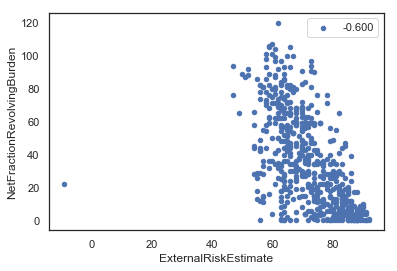

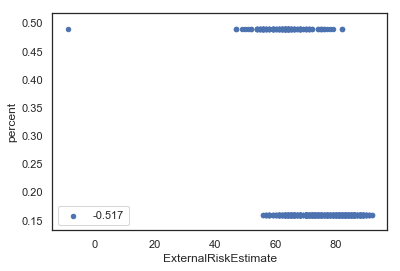

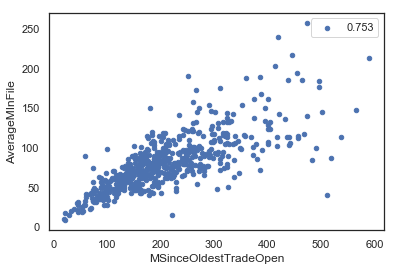

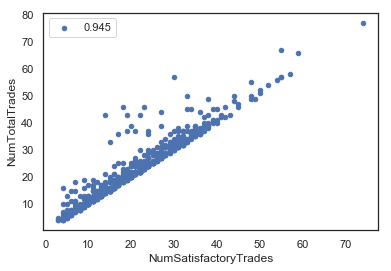

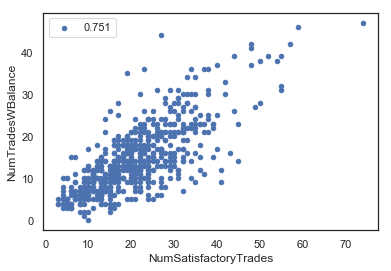

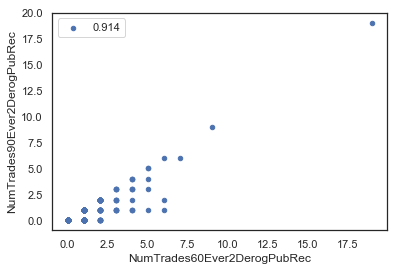

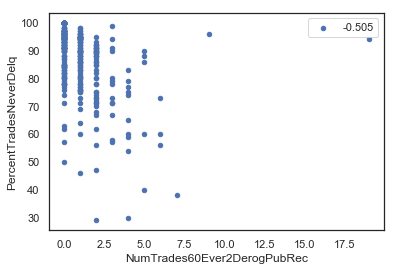

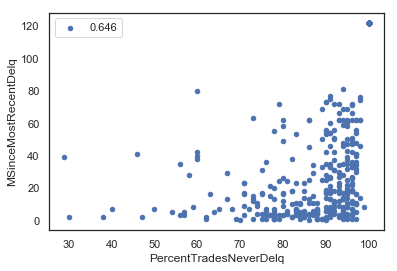

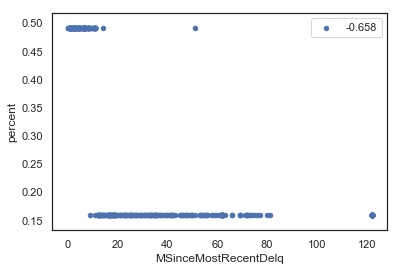

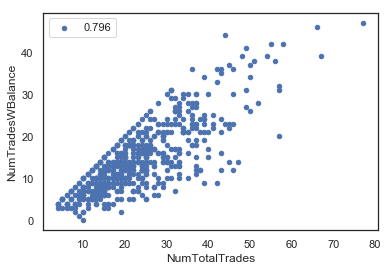

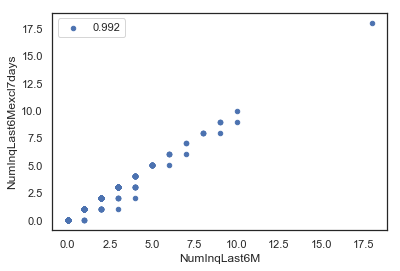

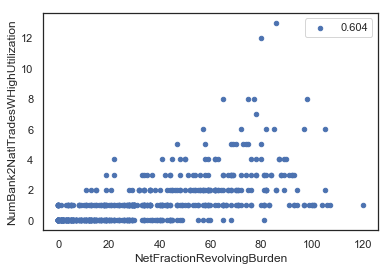

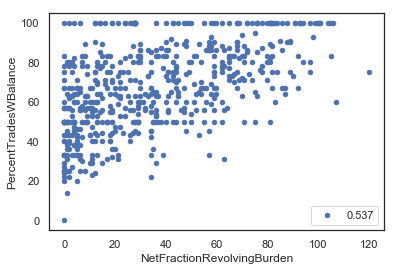

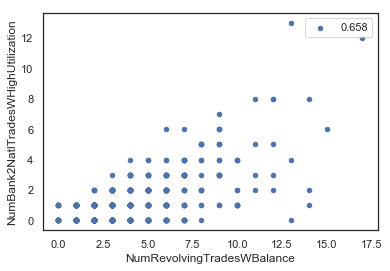

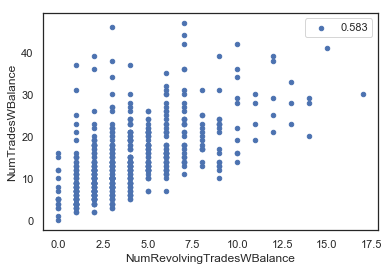

In [15]:
compare_list = []

# Select each column
for i in range(0,len(relevant_features.columns)):
    needed = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]].index
    values = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]].values
    print("FEATURE IS: ", relevant_features.columns[i])
    print("Needs to correlate with: ", needed)
    print()
    print("Create correlation between: ")
    
    # Select each needed row within each column
    for j in range(0, len(needed)):
        # if the correlation has already been plotted don't do it again
        if (relevant_features.columns[i], needed[j], values[j]) not in compare_list:
            print("x is: ", relevant_features.columns[i])
            print("y is: ", needed[j])
            print("value is: ", values[j])
            
            # Plot the scatter plot
            df_continuous_columns.plot(kind='scatter', x=relevant_features.columns[i], y=needed[j], label="%.3f" % df_continuous_columns[[relevant_features.columns[i], needed[j]]].corr().as_matrix()[0,1])
            
            # add the correlation to the list so that it is not plotted again
            compare_list.append((needed[j], relevant_features.columns[i], values[j]))
            print()
            
        # If they have already been checked print a message
        if (relevant_features.columns[i], needed[j], values[j]) in compare_list:
            print("Pair already checked!")
            print()
    print("\n" * 2)
    print("x" + "-" * 65 + "x")
    

# Show the comparison list for debugging purposes
compare_list

### The feature pairs that show the highest negative and positive correlations are:

In [16]:
#Checking what "percent" feature is all about
df_train['percent'].unique()

array([0.16      , 0.49019608])

In [17]:
compare_list = sorted(compare_list, key=lambda value: value[2])
compare_list
for i in range(len(compare_list)):
    print("- ", compare_list[i][0], "with", compare_list[i][1], "= ", compare_list[i][2])
    print()


-  percent with MSinceMostRecentDelq =  -0.6579660434773489

-  NetFractionRevolvingBurden with ExternalRiskEstimate =  -0.6004034176546652

-  percent with ExternalRiskEstimate =  -0.5165825508311973

-  PercentTradesNeverDelq with NumTrades60Ever2DerogPubRec =  -0.5046357581767601

-  PercentTradesNeverDelq with ExternalRiskEstimate =  0.5305042055998912

-  PercentTradesWBalance with NetFractionRevolvingBurden =  0.5370489474169765

-  NumTradesWBalance with NumRevolvingTradesWBalance =  0.5834227926253729

-  NumBank2NatlTradesWHighUtilization with NetFractionRevolvingBurden =  0.6042555227905054

-  MSinceMostRecentDelq with ExternalRiskEstimate =  0.6122368610689398

-  MSinceMostRecentDelq with PercentTradesNeverDelq =  0.6463134629009658

-  NumBank2NatlTradesWHighUtilization with NumRevolvingTradesWBalance =  0.6583266303976674

-  NumTradesWBalance with NumSatisfactoryTrades =  0.7507922844851392

-  AverageMInFile with MSinceOldestTradeOpen =  0.7529735258768895

-  NumTrade

The following Correlations do not provide any usefull information on risk as no feature on it's own makes reference to risk performance: 
- NumTradesWBalance with NumTotalTrades 
- AverageMInFile with MSinceOldestTradeOpen
- NumBank2NatlTradesWHighUtilization with NumRevolvingTradesWBalance
- PercentTradesWBalance with NetFractionRevolvingBurden
- NumTradesWBalance with NumRevolvingTradesWBalance
- NumBank2NatlTradesWHighUtilization with NetFractionRevolvingBurden

The continous features above have the potential to have a strong impact on risk:
- percent with MSinceMostRecentDelq. Percent is a place holder feature created in order to be able to chart certain correlations therefore it lack meainnig in order to be used for a prediction model. It is neccessary to consult the domain expert in order to double check and verify if this is the case.

- NetFractionRevolvingBurden with ExternalRiskEstimate has a strong negative correlation and could indicate that when your balance in relation to your credit increases (ie. you owe more money) your FICO score decreases "Net Fraction Revolving Burden: When the net fraction revolving burden increases by 1 unit, meaning your balance in relation to your credit increases, the FICO score decreases on average by 0.95 points" (FICO CREDIT RISK DATA). As you owe more money it is logical to expect that your risk estimate from the external source will get worse and increase the risk. This is absolutely what the negative correlation points to. 

- percent with ExternalRiskEstimate. Percent is a place holder feature created in order to be able to chart certain correlations therefore it lack meainnig in order to be used for a prediction model. It is neccessary to consult the domain expert in order to double check and verify if this is the case.

- There is a strong negative correlation between PercentTradesNeverDelq and NumTrades60Ever2DerogPubRec which indicates that the more Trades that are never delinquent the less trades that would be Derogatory over 60 days. We need to be carefull with this correlation as it implies that if you have a high percentage of never delinquent trades you are less likely to be 60 days delinquent however if you've none or very few trades in total you may not have a solid and long history proving a good risk performance. 

- PercentTradesNeverDelq with ExternalRiskEstimate points correctly to having a bigger percentage of never delinquent trades pointing to better risk score therefore the higher the percentage the more right the dots are as the more External Risk Estimate the better borrower one is.

- Correlation between MSinceMostRecentDelq with ExternalRiskEstimate shows strong correlation with an external entity estimating the risk of trade. This correlation would have a sizeable inpact in the prediction of risk. an external risk stimation seems like good second opinion.

- Correlation between MSinceMostRecentDelq with PercentTradesNeverDelq indicates that the more months that pass by with out being delinquent from the last delinquent trade equates to having less delinquent trades over all. I take this correlation to have a positive inpact in the prediction of risk due to that.

- Correlation between NumTradesWBalance with NumSatisfactoryTrades indicates potentially having a balance in a contract means that it will be satisfactory in nature. Here we are able to percieve this as potentially a case of Storks don't deliver babies as explained by Will Badr in: https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4. The other side of the coin would argue that as lending has been and is a profitable business in general terms the fact that there is a trade awarded would by default mean that is positive as lending is given to worthy individuals to begin with who undergo an initial screening proccess to be able to get the trade. 

- We find high correlation of 0.84 between NumTrades90Ever2DerogPubRec with NumTrades60Ever2DerogPubRec highlighting that once you are delinquent for a period of 60 days it is a good marker for furhter delinquency of up to at least 90 days. Due to the high correlation betwwen these features I believe that using NumTrades60Ever2DerogPubRec would give a more accurate prediction of risk as it logs data in advance of NumTrades90Ever2DerogPubRec.

- Strong correlation between NumTotalTrades with NumSatisfactoryTrades seems to indicate that just having a trade would equate to having a satisfactory trade however logic tells us that this could be a case of Storks don't deliver babies as explained by Will Badr in: https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4. It is neccessary to point out the other side of the coin and take into account that lending has been and is profitable and worth while for companies therefore you'd expect that quite a high percentage of trades in general would be Satisfactory.

- Correlation between NumInqLast6Mexcl7days with NumInqLast6M does not provide much information as the former feature seems to be just a subset of the latter feature. NumInqLast6M would be best used to predict impact on risk as it contains more information than NumInqLast6Mexcl7days.


it is important to note that if the scatter plot does not show a linear relationship the correlation does not reveal much information and may be useless. The relationship between two features may exist but be misleading

With the above point in mind the continous features that may have strong impact on the risk prevention and with strong positive and negative correlation that show a clearer linear relationship in scatter plots between each other are:

- NumTotalTrades with NumSatisfactoryTrades
- NumTradesWBalance with NumSatisfactoryTrades
- NumTrades90Ever2DerogPubRec with NumTrades60Ever2DerogPubRec
- NumInqLast6Mexcl7days with NumInqLast6M

### For each continuous feature, plot its interaction with the target feature (a plot for each pair of continuous feature and target feature). Discuss what you observe from these plots, e.g., which continuous features seem to be better at predicting the target feature? Choose a subset of continuous features you find promising (if any). Justify your choices.

- Change Target category values to continous values and type of feature from object to int64 in order to be able to plot correlation scatter plots between continous features and target feature
- Target feature value 'Good' is given the value 1 to keep positive numerical value and value 'Bad' is given the value 0 instead.

In [18]:
# change values and type of Target feature
df_train['RiskPerformance'] = df_train['RiskPerformance'].replace('Bad', 0)
df_train['RiskPerformance'] = df_train['RiskPerformance'].replace('Good', 1)
df_train['RiskPerformance'] = df_train['RiskPerformance'].astype('int64')

In [19]:
# Check that values and type has changed to desired
df_train['RiskPerformance'].head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: RiskPerformance, dtype: int64

In [20]:
df_train.columns[0]

'RiskPerformance'

In [21]:
df_train.columns[0]

'RiskPerformance'

C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or 

Correlation for  ExternalRiskEstimate is:  0.44924405845395804

Correlation for  MSinceOldestTradeOpen is:  0.15432144948405793

Correlation for  MSinceMostRecentTradeOpen is:  0.13990912416595622


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



Correlation for  AverageMInFile is:  0.205968998944083

Correlation for  NumSatisfactoryTrades is:  0.04696287631875607


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



Correlation for  NumTrades60Ever2DerogPubRec is:  -0.12244121378637236

Correlation for  NumTrades90Ever2DerogPubRec is:  -0.10320073271300172

Correlation for  PercentTradesNeverDelq is:  0.24546450414061352


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



Correlation for  MSinceMostRecentDelq is:  0.3376791560789886

Correlation for  NumTotalTrades is:  0.024861718388153115

Correlation for  NumTradesOpeninLast12M is:  -0.1328362876264825


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



Correlation for  PercentInstallTrades is:  -0.10980000266579261

Correlation for  MSinceMostRecentInqexcl7days is:  -0.040265966372393575


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



Correlation for  NumInqLast6M is:  -0.2005333247362125

Correlation for  NumInqLast6Mexcl7days is:  -0.2022107639439615

Correlation for  NetFractionRevolvingBurden is:  -0.3403227561770642


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



Correlation for  NetFractionInstallBurden is:  -0.09401824071753989

Correlation for  NumRevolvingTradesWBalance is:  -0.16247302824697427


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



Correlation for  NumInstallTradesWBalance is:  -0.03576752145427977

Correlation for  NumBank2NatlTradesWHighUtilization is:  -0.2360737997757724

Correlation for  PercentTradesWBalance is:  -0.2756075168555531


C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



Correlation for  percent is:  -0.2714053999776329



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Correlation for  PercentSatisfactoryTrades is:  0.10519520343980973

Correlation for  NumTradesWBalance is:  -0.1360222031593619



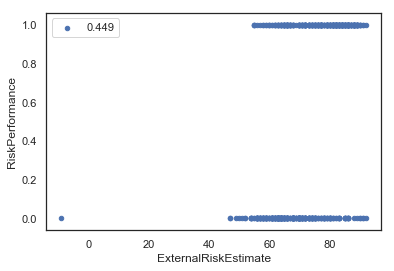

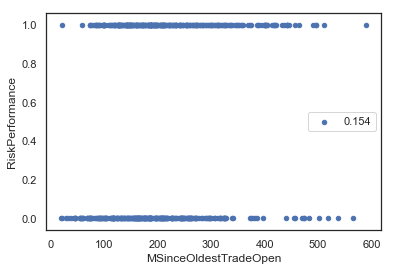

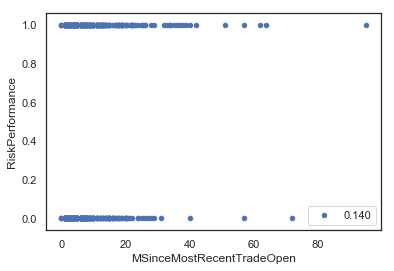

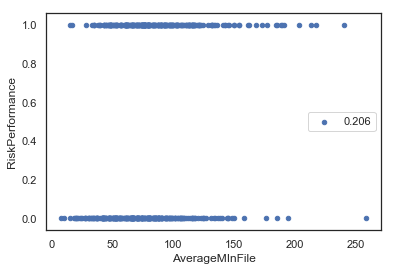

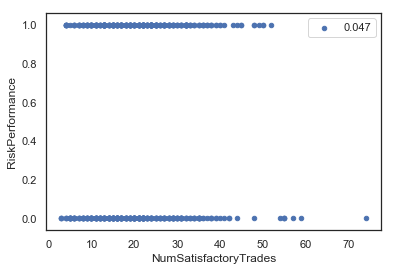

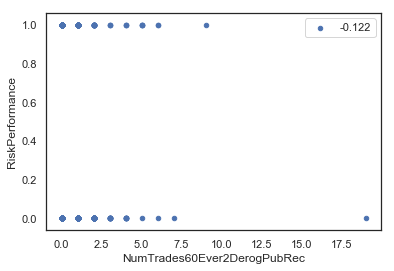

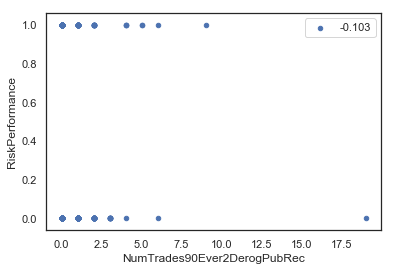

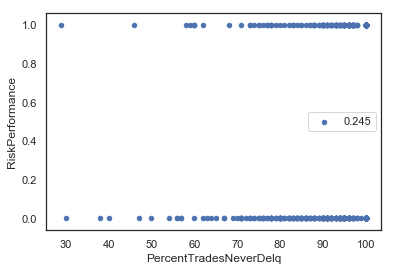

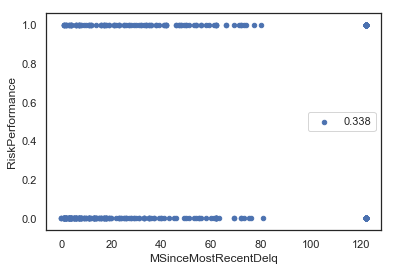

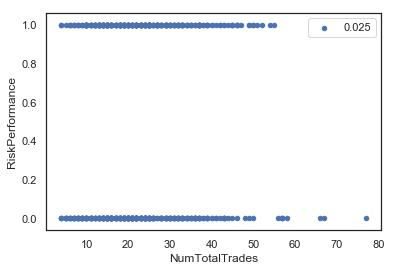

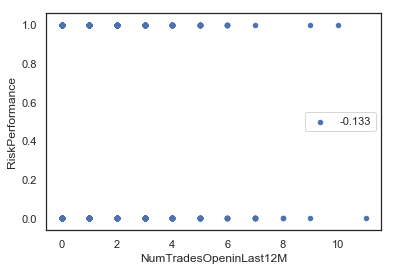

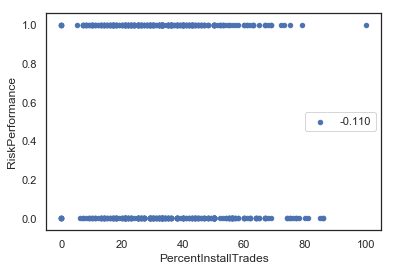

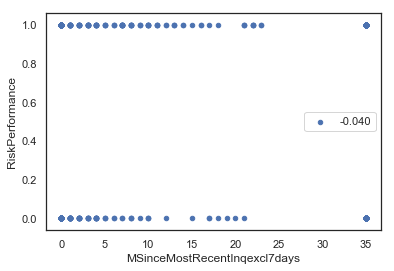

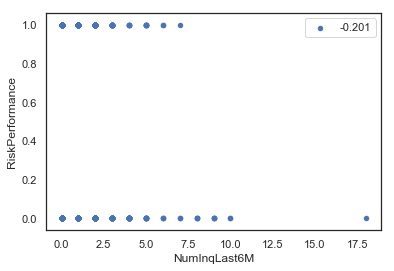

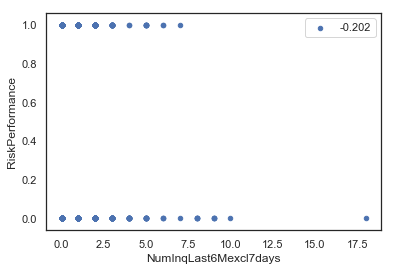

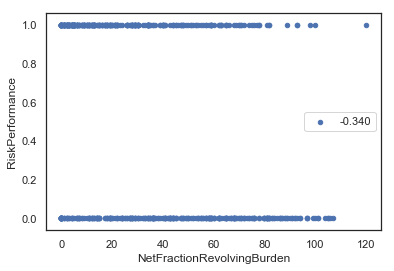

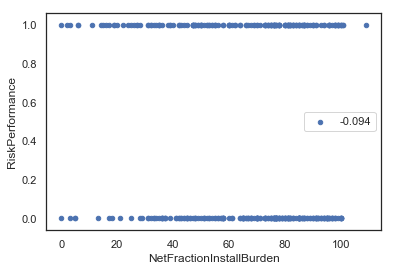

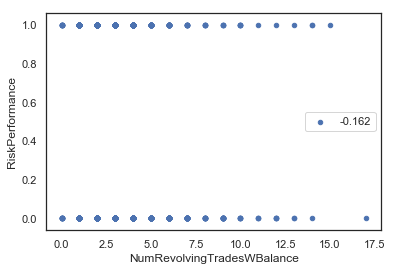

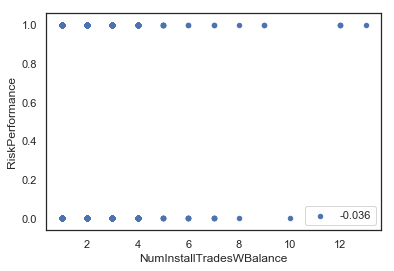

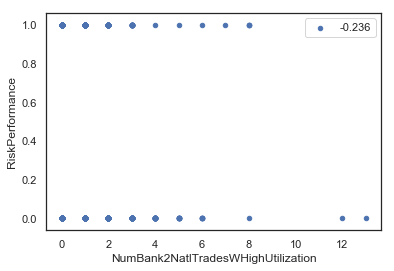

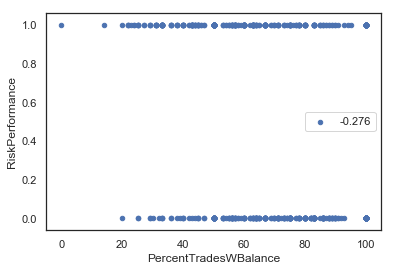

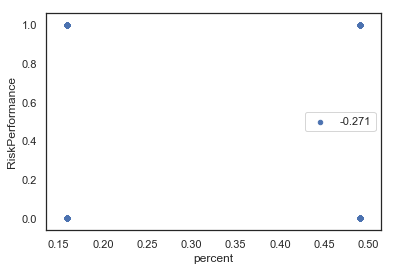

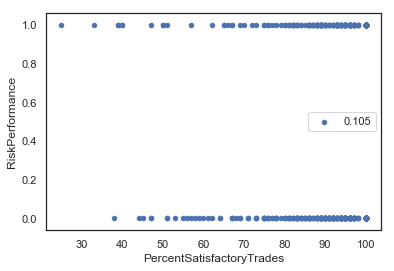

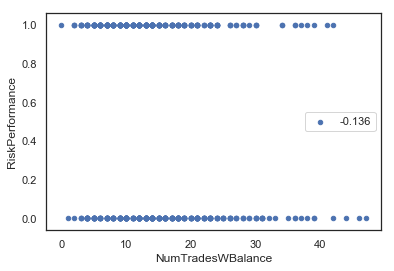

In [22]:
# plot correlations between continous features and target feature "RiskPerformance"
# add them to a list to be sorted
compare_list_risk = []

for i, k in enumerate(df_continuous_columns.columns):
        corrVriskPer = df_train[[k, 'RiskPerformance']].corr().as_matrix()[0,1]
        compare_list_risk.append((k, corrVriskPer))
        print("Correlation for ", k, "is: ",  corrVriskPer)
        df_train.plot(kind='scatter', x=df_continuous_columns.columns[i], y=df_train.columns[0], label="%.3f" % df_train[[df_continuous_columns.columns[i], df_train.columns[0]]].corr().as_matrix()[0,1])
        print()

In [23]:
# Sort and Print correlations

compare_list_risk = sorted(compare_list_risk, key=lambda value: value[1])
compare_list_risk

for i, k in enumerate(compare_list_risk): 
        print("Correlation against: ", compare_list_risk[i][0], "is:", compare_list_risk[i][1])

Correlation against:  NetFractionRevolvingBurden is: -0.3403227561770642
Correlation against:  PercentTradesWBalance is: -0.2756075168555531
Correlation against:  percent is: -0.2714053999776329
Correlation against:  NumBank2NatlTradesWHighUtilization is: -0.2360737997757724
Correlation against:  NumInqLast6Mexcl7days is: -0.2022107639439615
Correlation against:  NumInqLast6M is: -0.2005333247362125
Correlation against:  NumRevolvingTradesWBalance is: -0.16247302824697427
Correlation against:  NumTradesWBalance is: -0.1360222031593619
Correlation against:  NumTradesOpeninLast12M is: -0.1328362876264825
Correlation against:  NumTrades60Ever2DerogPubRec is: -0.12244121378637236
Correlation against:  PercentInstallTrades is: -0.10980000266579261
Correlation against:  NumTrades90Ever2DerogPubRec is: -0.10320073271300172
Correlation against:  NetFractionInstallBurden is: -0.09401824071753989
Correlation against:  MSinceMostRecentInqexcl7days is: -0.040265966372393575
Correlation against:  N

From the above correlations between continous and the target feature of 'RiskPerformance' we generally find weak correlations both negative and positive. There is only one feature that may be described as having a sizeable relationship, namely that of ExternalRiskEstimate with RiskPerformance.

There is a need to mention the negative correlation between NetFractionRevolvingBurden and RiskPerformance as this pair wise correlation is the strongest negative correlation eventhough it falls inside a weak negative linear relationship.

The other correlations will not be examined as they show insuficient correlation coefficient to be worth examination.

From examining the scatter plots on the two selected correlations describe above we find:

**ExternalRiskEstimate with RiskPerformance:**
We are not able to extract meaningfull information as data is aligned with similar structures for both 1 (good) and 0 (bad). We can not see a threshold of good risk performance and bad risk performance with the scatterplot. 

Dots placed in the top of the chart mean positive risk performance and therefore we would expect them to be placed towards the left handside. 

While dots placed in the bottom of the chart mean that they have a bad risk performance and should be placed to the right hand side of the chart. 

Dots both based in 0 and 1 are at the right handside of the chart mainly therefore throwing into doubt the meaning of the scatter plot representation. 

**NetFractionRevolvingBurden with RiskPerformance:**
Even though there is weak negative correlation between these two features as it is the highest negative correlation between a continous feature and risk performance I will look at the scatter plot to ascertain further meaning from it. 

In this scatter plot we find no meaningfull information as like the previous pairwise correlation the data does not seem to align as expected. 

The dots on the top being good risk performance should be towards the left as they would have a smaller NetFractionRevolvingBurden as having a small NetFractionRevolvingBurden means you owe less money therefore logically risk should be less risk.

The dots on the bottom representing bad risk performance should be located towards the right hand side of the chart as they would have a higher NetFractionRevolvingBurden as having a big NetFractionRevolvingBurden means you owe more money therefore logically should be more risk.

*After investigating the correlations of the continous features against the target feature 'RiskPerformance' and their scatterplots we find no promising subset of features from this exercise that help in the predition of the target feature due to the above reasons and justifications*

### For each categorical feature, plot its pairwise interaction with the target feature. Discuss what knowledge you gain from these plots, e.g., which categorical features seem to be better at predicting the target feature? Choose a subset of categorical features you find promising (if any). Justify your choices.

In [24]:
# Select columns containing categorical data
df_categorical_columns = df_train.select_dtypes(include=['bool', 'category'])

In [25]:
# check all are categorical
df_categorical_columns.columns

Index(['MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'DelqEver', 'DelqLast12M'], dtype='object')


k
Index 	 Count
7 	 444
6 	 101
2 	 14
5 	 10
3 	 5
4 	 5

k
Index 	 Count
6 	 180
7 	 256
2 	 50
5 	 50
3 	 22
4 	 21

k
Index 	 Count
True 	 323
False 	 256

k
Index 	 Count
False 	 444
True 	 135


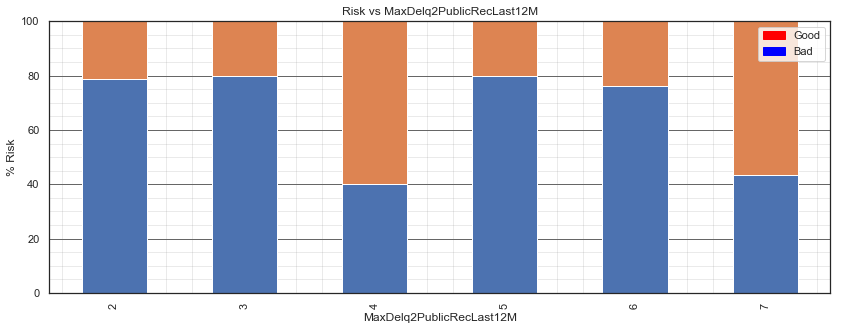

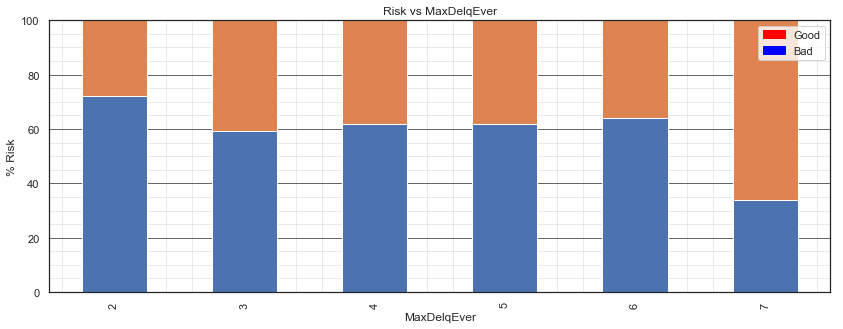

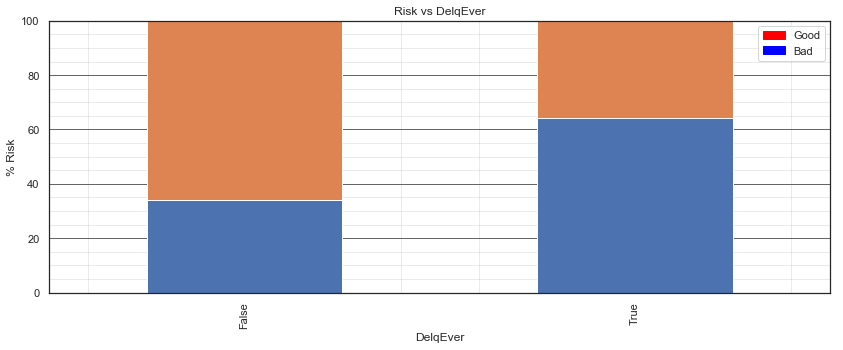

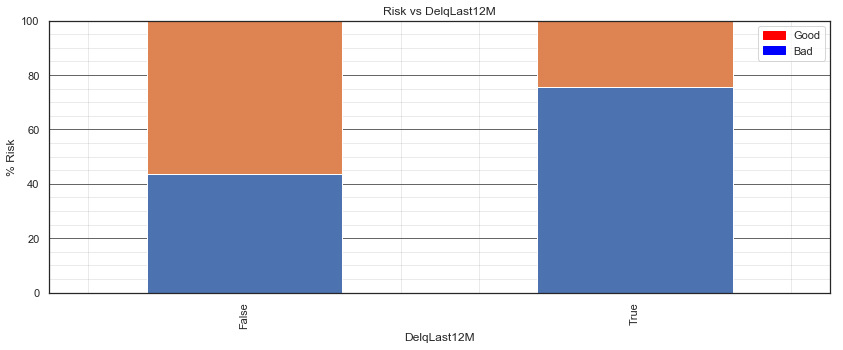

In [26]:
# create automatic plots for each categorical feature agains RiskPerformance
import matplotlib.patches as mpatches

for i, k in enumerate(df_categorical_columns):
    #Using code from the module lab
    maxDelqEver = pd.unique(df_train[k].ravel())

    # add new column and set values to zero
    df_train['percent_cat'] = 0

    #print header
    print()
    print("k")
    print("Index \t Count")

    # for each delinquency category
    for i in maxDelqEver:

        count = df_train[df_train[k] == i].count()['RiskPerformance']
        count_percentage = (1 / count) * 100

        # print out index vs count
        print(i, "\t", count)

        index_list = df_train[df_train[k] == i].index.tolist()
        for ind in index_list:
            df_train.loc[ind, 'percent_cat'] = count_percentage

    group = df_train[['percent_cat',k,'RiskPerformance']].groupby([k,'RiskPerformance']).sum()

    my_plot = group.unstack().plot(kind='bar', stacked=True, title="Risk vs " + k, figsize=(14,5), grid=True)

    # add legend
    red_patch = mpatches.Patch(color='red', label='Good')
    blue_patch = mpatches.Patch(color='blue', label='Bad')
    my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

    # add gridlines
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    my_plot.set_xlabel(k)
    my_plot.set_ylabel("% Risk")
    my_plot.set_ylim([0,100])

- **DelqEver** measures if a entry during their history has ever been delinquent. The chart plotted of the pairwise comparison between DelqEver with RiskPerformance has a positive correlation by showing that if you have ever been delinquent (true) there is a bigger "bad" side than good side with a 65/35 split, while if you have **never** been delinquent the bad portion is sizeably smaller than the good portion of the bar with a 35/65 split. Both bars show the complete opposite to each other.

- **DelqLast12M** measures if an entry during the last 12 months has ever been delinquent. The chart plotted between DelqLast12M shows positive correlation between true which means that you have been delinquent in the last 12 months to getting a bad risk performance with 75% and getting a good risk performance of 25%. While the opposite is also the case for not been delinquent, however not in as clear a manner as within the true column as the last 12 months show a bad risk performance smaller to a good risk performance of near 45% to 55% and these two figures are close to each other. I treat DelqLast12M as more accurate as it would be harder for a financial institution to miss a record on the last twelve months compared to an entire history which gives a fuller chance of better data.

- **MaxDelq2PublicRecLast12M** with values 0 to 4 inclusive been bad categories in this feature and 5 to 9 been at least neutral or non negative categories if not positive with in the feature. There is no 0, 1, 8 or 9 bins. Bins 2(90 days), 3(60 days) show a logical correlation as these have higher percentage of risk and they do however bin 4(30 days) delinquent has a 40% bad and 60% good assigned to it, this being logically wrong. Consultation with the domain expert may indicate the weight of each bin when it comes to adjudicating risk to a customer. bins 5 and 6 mean unknown deliquency which is not neccessary bad but may not be positive either. Again consultation with the domain expert would need to be carried out to find further informaton as to how to treat these categories in the feature. Bin 7 means currently and never delinquent therefore it is a beneficial aspect. In bin 7 we have a slightly logical chart representation as you would expect that if a trade falls in this category it should get a bigger "good" than "bad". This is the case however good percentage is 45% and bad percentage is about 55% thus why I say it is only a slight logical representation. I treat DelqLast12M as more accurate as it would be harder for a financial institution to miss a record on the last twelve months compared to an entire history which gives a fuller chance of better data.

- **MaxDelqEver** as with the previous feature of MaxDelq2PublicRecLast12M there is no 0, 1, 8 or 9 bins. Bin 2 means a derogaroty comment and bins 3(120+), 4(90 days), 5(60 days) and 6(30 days) delinquent. Looking at bins 2 to 6 we see a 60% or more percentage of "bad" risk which seems to be logically correct as when falling in a negative or unwelcomed bin the "bad" percentage logically should be bigger. Bin number 7 means unknown delinquency which would need clarification from the domain expert so as to ascertain whether this bin has a welcomed or unwelcomed meaning. 

- **Percent** is a placeholder for a previous exercise and is not taken into consideration.

*I think that DelqEver, DelqLast12M and MaxDelqEver would be usefull features to use in prediction of risk for a trade for the reasons raised above while MaxDelq2PublicRecLast12M seems to be only partially logically correlated to risk*


# Predictive Modeling: Linear Regression.

### (2.1) On the training set, train a linear regression model to predict the target feature, using only the descriptive features selected in exercise (1) above. 

- The predictive features that have been chosen for the reasons descrived above in order to train a linear regression model to predict the target feature of RiskPerformance are. To begin with, I take the continous features with the highest positve and highest negative correlations against the target feature that I believe have a logical inpact on the target feature. Afterwards we take the continous features selected and see if they correlate against any other continous features as if so the other continous features could have a weight in predicting the risk performance. At this point I compare the extra feature selected against the target feature to see if it is indeed worthwhile and if not I do not use it:

**Continous to continous features**

NetFractionRevolvingBurden

PercentTradesWBalance

PercentTradesNeverDelq

MSinceMostRecentDelq

ExternalRiskEstimate


**Categorical to target feature**

DelqLast12M

MaxDelq2PublicRecLast12M

For categorical features as they are categories we need to perform the one hot encoding as when performing linear regresion this can not be done with categorical features therefore by creating dummies we assign numerical values to the categories in order to make this feature continous in nature.

In [27]:
# need to change the type of DelqLast12M in order to create dummy
df_train['DelqLast12M'] = df_train['DelqLast12M'].astype('category')

# Create dummies for DelqLast12M
featureDelq = pd.DataFrame(df_train['DelqLast12M'])
dummy = pd.get_dummies(featureDelq)
df_train = pd.concat([df_train, dummy], axis = 1)

In [28]:
# Create dummies for MaxDelq2PublicRecLast12M
featureMaxDelq = pd.DataFrame(df_train['MaxDelq2PublicRecLast12M'])
dummy_2 = pd.get_dummies(featureMaxDelq)
df_train = pd.concat([df_train, dummy_2], axis = 1)

In [29]:
# Check dummy columns are created as needed.
df_train.columns

Index(['RiskPerformance', 'ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance',
       'percent', 'DelqEver', 'DelqLast12M', 'PercentSatisfactoryTrades',
       'NumTradesWBalance', 'percent_cat', 'DelqLast12M_False',
       'DelqLast12M_True', 'MaxDelq2PublicRecLast12M_2',
       'MaxDelq2PublicRecLast12M_3', 'MaxDelq2PublicRecLast12M_4',
       'MaxDelq2PublicRecLast12M_5', 'MaxDelq2PublicR

I check the values of all the dummy features created and find that MaxDelq2PublicRecLast12M_ 3 and 4 show that they have an extremely low number of values "1" therefore have an almost unnotizable impact in the target feature. We find that on MaxDelq2PublicRecLast12M_ 2 and 5 a similar issue however in order to keep the integrity of the dummies I have decided to keep these balancing 3 and 4 that have been removed

In [30]:
# Check for values in dummies
for i in range(30,38):
    size = df_train[df_train[df_train.columns[i]] == 1][df_train.columns[i]].size
    print("size for ", df_train.columns[i], size)


size for  DelqLast12M_False 444
size for  DelqLast12M_True 135
size for  MaxDelq2PublicRecLast12M_2 14
size for  MaxDelq2PublicRecLast12M_3 5
size for  MaxDelq2PublicRecLast12M_4 5
size for  MaxDelq2PublicRecLast12M_5 10
size for  MaxDelq2PublicRecLast12M_6 101
size for  MaxDelq2PublicRecLast12M_7 444


### Initiate training with linear regression on selected features

I have kept two sets of cont_features, one with all the dummies and another one without MaxDelq2PublicRecLast12M_ 3 and 4 as explained above. On of them is to be commented out so as to work with the other. This allows to work with the two of them separately if wished.

In [31]:
# Prepare the descriptive features

# cont_features = ['NetFractionRevolvingBurden', 'PercentTradesWBalance', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'ExternalRiskEstimate', 'DelqLast12M_False', 'DelqLast12M_True', 'MaxDelq2PublicRecLast12M_2', 'MaxDelq2PublicRecLast12M_3', 'MaxDelq2PublicRecLast12M_4', 'MaxDelq2PublicRecLast12M_5', 'MaxDelq2PublicRecLast12M_6', 'MaxDelq2PublicRecLast12M_7']

#same as above but WITHOUT MaxDelq2PublicRecLast12M_ 3 AND 4 as few trades aprox less than 5 as a result no inpact on the actual target feature
cont_features = ['NetFractionRevolvingBurden', 'PercentTradesWBalance', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'ExternalRiskEstimate', 'DelqLast12M_False', 'DelqLast12M_True', 'MaxDelq2PublicRecLast12M_2', 'MaxDelq2PublicRecLast12M_5', 'MaxDelq2PublicRecLast12M_6', 'MaxDelq2PublicRecLast12M_7']

x = df_train[cont_features]
y = df_train.RiskPerformance

print("Features selected are: ", x.columns)
print("Target is: ", y.name)

Features selected are:  Index(['NetFractionRevolvingBurden', 'PercentTradesWBalance',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'ExternalRiskEstimate', 'DelqLast12M_False', 'DelqLast12M_True',
       'MaxDelq2PublicRecLast12M_2', 'MaxDelq2PublicRecLast12M_5',
       'MaxDelq2PublicRecLast12M_6', 'MaxDelq2PublicRecLast12M_7'],
      dtype='object')
Target is:  RiskPerformance


### (2.2) Print the coefficients learned by the model and discuss their role in the model (e.g., interpret the model).

In [32]:
# Use multiple features for training
# Train aka fit, a model using all continuous features.

multiple_linreg = LinearRegression().fit(x[cont_features], y)

coefi = []
# Add feature with coeficient to list
for i, k in enumerate(cont_features):
    coefi.append((cont_features[i], multiple_linreg.coef_[i]))
    
# Arrange coeficients by value    
coefi = sorted(coefi, key=lambda value: value[1])

# Orderly print the weights learned for each feature.
for i, k in enumerate(coefi):
    print("Feature: ", coefi[i][0], "  Coeficient is: ", coefi[i][1])
    print()

print("\nIntercept: \n", multiple_linreg.intercept_)

Feature:  MaxDelq2PublicRecLast12M_5   Coeficient is:  -0.10198450304328424

Feature:  MaxDelq2PublicRecLast12M_6   Coeficient is:  -0.08580794806560774

Feature:  MaxDelq2PublicRecLast12M_2   Coeficient is:  -0.015784416423053765

Feature:  DelqLast12M_False   Coeficient is:  -0.009723443587143242

Feature:  MaxDelq2PublicRecLast12M_7   Coeficient is:  -0.00972344358714324

Feature:  PercentTradesWBalance   Coeficient is:  -0.0026419602924165142

Feature:  PercentTradesNeverDelq   Coeficient is:  -0.0019328099687887339

Feature:  NetFractionRevolvingBurden   Coeficient is:  -0.0019032926191136484

Feature:  MSinceMostRecentDelq   Coeficient is:  0.001568846807537386

Feature:  DelqLast12M_True   Coeficient is:  0.00972344358714326

Feature:  ExternalRiskEstimate   Coeficient is:  0.011887252599404879


Intercept: 
 -0.021667285615495913


looking at the coeficients we find the following:

- For MaxDelq2PublicRecLast12M_ with numbers 3, 5, 6 these are part of the initial categorical feature MaxDelq2PublicRecLast12M and when we find a value on any of these newly created features we deduct that we are getting closer to obtaining a "bad" riskperformance prediction as we decrease our prediction value by the coefficient value of that feature. By comparing these features coeficients with the graph we see that the coeficients are in tune with the graph as there is a bigger percentage of negative than positive for these features bars.

- Following from the above features descriptions we find that MaxDelq2PublicRecLast12M_ with numbers 7, 2 and 4 we deduct than when a trade falls in any of these newly created dummy features we are getting closer to a "good" risk performance prediction as we increase the prediction value byt the coefficient value of that feature. By double checking with the bar chart for this feature, bins 4 and 7 show coefficients properly describing their own bins in the chart while bin 2 seems to be the opposite of what is expected as the coeficient is positive while the bin 2 shows sustantially more "bad" (c. 80%) than good (c. 20%).  


In [33]:
# test MaxDelq2PublicRecLast12M_2 on its own to see coeficient of feature on its own
XX = df_train[['MaxDelq2PublicRecLast12M_2']]
yy = df_train.RiskPerformance

linreg2 = LinearRegression().fit(XX, yy)

print("Coeficients: \n", linreg2.coef_)
print("\nIntercept: \n", linreg2.intercept_)

Coeficients: 
 [-0.28305942]

Intercept: 
 0.49734513274336284


- We find that MaxDelq2PublicRecLast12M_2 on its own gives a similar view to the chart MaxDelq2PublicRecLast12M for bin 2

- PercentTradesWBalance describes that for every unit of measure increase in this feature the prediction gets closer to a "bad" prediction result by the coeficient amount. This is in accordance with what we have seen so far.

- DelqLast12M_True and DelqLast12M_False show their respective coeficients to be logically valued as when it is true that there has been a delinquency in the last 12 months the coeficient is negative and viceversa for False

- With NetFractionRevolvingBurden shows a correct logical negative correlation as when a revolving burden increase, the credit rating should decrease meaning a "bad" score should be closer and this is what the coeficient points to with a negative value. 

- PercentTradesNeverDelq shows a negative and this is logically wrong as the more percentage of trades never delinquent should aproximate us towards a "good" prediction and getting a negative coeficient value as we are is counter intuitive to this reasoning. 

- MSinceMostRecentDelq reasoning should be that the more months since the most recent delinquent trade the closer we would have to be to a "good" score and viceversa. Here we are obtaining a positive coeficient reinforcing this reasoning.

- ExternalRiskEstimate is displaying a positive coeficient which follows our reasoning of the bigger score or external risk stimate the less probability of risk therefore the better borrower you are and the closer to "good" that you should be. 

### (2.3) Print the predicted target feature value for the first 100 training examples.

In [34]:
# Make a prediction on all training dataset
prediction_train = multiple_linreg.predict(x[cont_features])

# print predicted feature value for first 100 training examples
for i in range(100):
    print(" prediction for ", i, " is: ", prediction_train[i])

 prediction for  0  is:  0.22353308524949447
 prediction for  1  is:  0.45625384476050834
 prediction for  2  is:  0.570032150623556
 prediction for  3  is:  0.52053326680906
 prediction for  4  is:  0.2076326259641366
 prediction for  5  is:  0.01813778008335229
 prediction for  6  is:  0.11015817110596776
 prediction for  7  is:  -0.028272732576011636
 prediction for  8  is:  0.26414401434920637
 prediction for  9  is:  0.7522364478203053
 prediction for  10  is:  0.37102924775033935
 prediction for  11  is:  0.5578203328253338
 prediction for  12  is:  0.3851021511074556
 prediction for  13  is:  0.2767327247560797
 prediction for  14  is:  0.8975587443858021
 prediction for  15  is:  0.3232000810217704
 prediction for  16  is:  0.5667216210276522
 prediction for  17  is:  0.604358902791674
 prediction for  18  is:  0.9726951200863365
 prediction for  19  is:  0.20650872883862334
 prediction for  20  is:  0.571231609192845
 prediction for  21  is:  0.5385088638384301
 prediction for

### Threshold the predicted target feature value given by the linear regression model at 0.5, to get the predicted class for each example.

In [35]:
# Apply the threshold of 0.5 and check all values are either 0 or 1
for i in range(len(prediction_train)):
    if prediction_train[i] < 0.5:
        prediction_train[i] = 0
    else:
        prediction_train[i] = 1
        
print(prediction_train)

[0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0.

### Print the predicted class for the first 100 examples. 

In [36]:
# create emptly list
predicted_class = [0] * len(prediction_train)

# give the correct value depending on the predicted value
for i in range(len(prediction_train)):
    if prediction_train[i] == 0:
        predicted_class[i] = 'Bad'
    else:
        predicted_class[i] = 'Good'
        
# print the predicted values and newly created class to check the first 100 examples
print('Predicted value',"        ", 'predicted_class')  
print()
for i in range(100):
    print(prediction_train[i],"                    ", predicted_class[i] )
        

Predicted value          predicted_class

0.0                      Bad
0.0                      Bad
1.0                      Good
1.0                      Good
0.0                      Bad
0.0                      Bad
0.0                      Bad
0.0                      Bad
0.0                      Bad
1.0                      Good
0.0                      Bad
1.0                      Good
0.0                      Bad
0.0                      Bad
1.0                      Good
0.0                      Bad
1.0                      Good
1.0                      Good
1.0                      Good
0.0                      Bad
1.0                      Good
1.0                      Good
0.0                      Bad
1.0                      Good
0.0                      Bad
1.0                      Good
1.0                      Good
0.0                      Bad
1.0                      Good
1.0                      Good
0.0                      Bad
0.0                      Bad
0.0            

### Print the classification evaluation measures computed on the training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.

In [37]:
from sklearn.metrics import confusion_matrix

# give the actual RiskPerformance value to a newly created list
actual_val = list(y)

predict_val = prediction_train
confusion_matrix(actual_val, predict_val)


array([[222,  73],
       [ 84, 200]], dtype=int64)

In [38]:
# find out which is actual and which is predictive for the confusion matrix
count_good = 0
count_bad = 0
for i in range(len(actual_val)):
    if actual_val[i] == 1:
        count_good += 1
    else:
        count_bad += 1
print("Good", count_good)
print("Bad", count_bad)

Good 284
Bad 295


Performing the confusion matrix above we find: 

|        -         |pred bad      |pred good|
|------------------|--------------|---------|
|actual bad        |222           |73       |
|------------------|--------------|---------|
|actual good       |84            |200      |


Here we see that True negatives are 222 while True positives are 200. False negatives are 84 while False positive are 73. It is appreciated that the model shows a higher than 50% accuracy with a much higher degree of True positives and negatives. Below we find the accuracy score.


The classifier is resulting in a ((73 + 84) / 579) = 27% wrong 

the classifier is resulting in a ((222 + 200) / 579) = 73% correct 


Precision: correctly predicted positive / predicted positive = 200 / 273 = 0.73

Recall: correctly predicted positive / actual positive = 200 / 284 = 0.70

F1-measure: aggregation of Precision and Recall = 2 x (0.73 x 0.7) / (0.73 + 0.7) = 2 x 0.511/ 1.43  = 0.71

Therefore a good balance between precision and recall is given to us by the F1-measure of 71%

further below we can see in more detail what these are showing by using sklearn

In [39]:
from sklearn.metrics import accuracy_score

# print the accuracy for the predictions against the train data frame
print(accuracy_score(actual_val, predict_val))

0.7288428324697754


In [40]:
from sklearn.metrics import classification_report

# get the classification report
targets = ['Bad_report', 'Good_report']
print(classification_report(actual_val, predict_val, target_names = targets))

              precision    recall  f1-score   support

  Bad_report       0.73      0.75      0.74       295
 Good_report       0.73      0.70      0.72       284

   micro avg       0.73      0.73      0.73       579
   macro avg       0.73      0.73      0.73       579
weighted avg       0.73      0.73      0.73       579



We find a good f1-score of 0.74 for bad report and 0.72 for good report.

### (2.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. 

In [41]:
# Read Test data frame from csv file into a dataframe.
df_test = pd.read_csv('Test.csv')

In [42]:
# select categorical feature form the test frame
test_cat_cols = df_test[['RiskPerformance', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'DelqEver', 'DelqLast12M']]

# select continous features from the test frame
test_con_cols = df_test.select_dtypes(include = ['int64', 'float64'])

# change type of categorical features if needed to category
for col in test_cat_cols:
    df_test[col] = df_test[col].astype('category')

    
# Change "good" for 1 and "bad" to 0
df_test['RiskPerformance'] = np.where(df_test['RiskPerformance'] == 'Good', 1, 0)
df_test.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,percent,DelqEver,DelqLast12M,PercentSatisfactoryTrades,NumTradesWBalance
0,0,56,180,3,80,35,1,1,95,4,...,96.0,7,2,2,91,0.490196,True,True,92.0,34
1,1,81,201,18,92,30,0,0,100,122,...,84.0,3,3,0,86,0.160000,False,False,94.0,27
2,1,74,218,9,71,24,0,0,100,122,...,88.0,7,3,0,77,0.160000,False,False,100.0,18
3,0,61,210,4,64,28,0,0,93,9,...,95.0,10,2,4,86,0.490196,True,True,100.0,24
4,1,77,218,8,72,25,0,0,96,74,...,69.0,3,4,0,64,0.160000,True,False,100.0,16


In [43]:
# need to change the type of DelqLast12M in order to create dummy
df_test['DelqLast12M'] = df_test['DelqLast12M'].astype('category')

# Create dummies for DelqLast12M
featureDelq2 = pd.DataFrame(df_test['DelqLast12M'])
dummy3 = pd.get_dummies(featureDelq2)
df_test = pd.concat([df_test, dummy3], axis = 1)

In [44]:
# Create dummies for MaxDelq2PublicRecLast12M
featureMaxDelq2 = pd.DataFrame(df_test['MaxDelq2PublicRecLast12M'])
dummy_4 = pd.get_dummies(featureMaxDelq2)
df_test = pd.concat([df_test, dummy_4], axis = 1)

In [45]:
df_test.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentSatisfactoryTrades,NumTradesWBalance,DelqLast12M_False,DelqLast12M_True,MaxDelq2PublicRecLast12M_2,MaxDelq2PublicRecLast12M_3,MaxDelq2PublicRecLast12M_4,MaxDelq2PublicRecLast12M_5,MaxDelq2PublicRecLast12M_6,MaxDelq2PublicRecLast12M_7
0,0,56,180,3,80,35,1,1,95,4,...,92.0,34,0,1,0,0,0,0,1,0
1,1,81,201,18,92,30,0,0,100,122,...,94.0,27,1,0,0,0,0,0,0,1
2,1,74,218,9,71,24,0,0,100,122,...,100.0,18,1,0,0,0,0,0,0,1
3,0,61,210,4,64,28,0,0,93,9,...,100.0,24,0,1,0,0,0,0,1,0
4,1,77,218,8,72,25,0,0,96,74,...,100.0,16,1,0,0,0,0,0,0,1


In [46]:
# safety check
cont_features = ['NetFractionRevolvingBurden', 'PercentTradesWBalance', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'ExternalRiskEstimate', 'DelqLast12M_False', 'DelqLast12M_True', 'MaxDelq2PublicRecLast12M_2', 'MaxDelq2PublicRecLast12M_5', 'MaxDelq2PublicRecLast12M_6', 'MaxDelq2PublicRecLast12M_7']

# set up the input for the prediction
input_test = pd.DataFrame(df_test[['NetFractionRevolvingBurden', 'PercentTradesWBalance', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'ExternalRiskEstimate', 'DelqLast12M_False', 'DelqLast12M_True', 'MaxDelq2PublicRecLast12M_2', 'MaxDelq2PublicRecLast12M_5', 'MaxDelq2PublicRecLast12M_6', 'MaxDelq2PublicRecLast12M_7']])

# actual real value
output_test = df_test.RiskPerformance

In [47]:
# predict on the test dataframe
predict_test = multiple_linreg.predict(input_test[cont_features])
predict_test

array([0.03597685, 0.65269387, 0.5532916 , 0.13555911, 0.57475836,
       0.29602111, 0.4837793 , 0.87832949, 0.44236433, 0.82416774,
       0.56318588, 0.76267733, 0.38859885, 0.59193192, 0.81175069,
       0.52241296, 0.55310037, 0.34221665, 0.79040927, 0.16198762,
       0.51221068, 0.25938147, 0.41102216, 0.22976641, 0.17989574,
       0.52314849, 0.07476413, 0.37316456, 0.15799865, 0.66089288,
       0.53356468, 0.85622551, 0.88598734, 0.12043233, 0.06710343,
       0.4132867 , 0.48331744, 0.85646142, 0.39301462, 0.34806766,
       0.13911247, 0.15648418, 0.4776563 , 0.97211124, 0.21744565,
       0.78206371, 0.96683046, 0.95023689, 0.26209891, 0.76314089,
       0.81807972, 0.48021958, 0.58433413, 0.51215156, 0.7665278 ,
       0.84149997, 0.64345485, 0.35066596, 0.00925973, 0.17347488,
       0.42371135, 0.69414976, 0.5312272 , 0.34730531, 0.37990802,
       0.65830304, 0.30945024, 0.76952087, 0.1142951 , 0.88171326,
       0.18323925, 0.35258358, 0.56918176, 0.38049366, 0.60246

In [48]:
# Apply the threshold of 0.5 and check all values are either 0 or 1
for i in range(len(predict_test)):
    if predict_test[i] < 0.5:
        predict_test[i] = 0
    else:
        predict_test[i] = 1
        
print(predict_test)

[0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0.]


In [49]:
# create emptly list
predicted_class_test = [0] * len(predict_test)

# give the correct value depending on the predicted value
for i in range(len(predict_test)):
    if predict_test[i] == 0:
        predicted_class_test[i] = 'Bad'
    else:
        predicted_class_test[i] = 'Good'
        
# print the predicted values and newly created class to check the first 100 examples
print('Predicted value',"        ", 'predicted_class_test')  
print()
for i in range(100):
    print(predict_test[i],"                    ", predicted_class_test[i] )

Predicted value          predicted_class_test

0.0                      Bad
1.0                      Good
1.0                      Good
0.0                      Bad
1.0                      Good
0.0                      Bad
0.0                      Bad
1.0                      Good
0.0                      Bad
1.0                      Good
1.0                      Good
1.0                      Good
0.0                      Bad
1.0                      Good
1.0                      Good
1.0                      Good
1.0                      Good
0.0                      Bad
1.0                      Good
0.0                      Bad
1.0                      Good
0.0                      Bad
0.0                      Bad
0.0                      Bad
0.0                      Bad
1.0                      Good
0.0                      Bad
0.0                      Bad
0.0                      Bad
1.0                      Good
1.0                      Good
1.0                      Good
1.0     

In [50]:
# give the actual RiskPerformance value to a newly created list
actual_val_test = list(output_test)

predict_val_test = predict_test
confusion_matrix(actual_val_test, predict_val_test)

array([[90, 40],
       [35, 83]], dtype=int64)

In [51]:
# find out which is actual and which is predictive for the confusion matrix
count_good_test = 0
count_bad_test = 0
for i in range(len(predict_val_test)):
    if predict_val_test[i] == 1:
        count_good_test += 1
    else:
        count_bad_test += 1
print("Good", count_good_test)
print("Bad", count_bad_test)

Good 123
Bad 125


Performing the confusion matrix above we find: 

|       -          |pred bad      |pred good|
|------------------|--------------|---------|
|actual bad        |90            |40       |
|------------------|--------------|---------|
|actual good       |35            |83       |


Here we see that True negatives are 90 while True positives are 83. False negatives are 35 while False positive are 40. It is appreciated that the model shows a higher than 50% accuracy with a much higher degree of True positives and negatives. Below we find the accuracy score.


The classifier is resulting in a ((35 + 40) / 248) = 30% wrong 

the classifier is resulting in a ((90 + 83) / 248) = 69% correct 


Precision: correctly predicted positive / predicted positive = 83 / 123 = 0.67

Recall: correctly predicted positive / actual positive = 83 / 118 = 0.70

F1-measure: aggregation of Precision and Recall = 2 x (0.67 x 0.7) / (0.67 + 0.7) = 2 x 0.469/ 1.37  = 0.68

Therefore a good balance between precision and recall is given to us by the F1-measure of 68%

further below we can see in more detail what these are showing by using sklearn

In [52]:
# print the accuracy for the predictions against the train data frame
print(accuracy_score(actual_val_test, predict_val_test))

0.6975806451612904


In [53]:
# get the classification report
targets_test = ['Bad_report', 'Good_report']
print(classification_report(actual_val_test, predict_val_test, target_names = targets_test))

              precision    recall  f1-score   support

  Bad_report       0.72      0.69      0.71       130
 Good_report       0.67      0.70      0.69       118

   micro avg       0.70      0.70      0.70       248
   macro avg       0.70      0.70      0.70       248
weighted avg       0.70      0.70      0.70       248



### Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation.

**Stats for the train data frame**

Precision: 0.73

Recall: 0.70

F1-measure: 0.71


**Stats for the test data frame**

Precision: 0.67

Recall: 0.70

F1-measure: 0.68


- We find that there is a big drop in the precission between the score obtained in the train dataframe compared to the one obtained in the test dataframe. A drop in prediction may mean the loss of profitable business for a lending institution on a "good" prediction and the creation of loss making trades on a "bad" prediction. Since the 2008 financial crash, the lending and financial world has gone conservative and focus more rigidly into not giving credit to unworthy individuals than loosing an oportunity to give credit to a worthy individual.

- We look into recall as well where we find the same score for both train and test dataframes. Recall concerns more with the correctly and by default incorrect predictions therefore adding explanation to a fuller picture. 

- When using the aggregation between the precision scores and the recall scores we find that there is a drop as well between the two dataframes obviously driven by the Precission score difference. 

### evaluated using cross-validation on the full dataset.

In [54]:
# use full dataframe - separate categorical features to continous features
cat_cols_comp = df[['RiskPerformance', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'DelqEver', 'DelqLast12M']].columns

for i in cat_cols_comp:
    df[i] = df[i].astype('category')
    
cont_cols_comp = df.select_dtypes(include=['int64', 'float64'])

# change "good" to 1 and "bad" to 0
df['RiskPerformance'] = np.where(df['RiskPerformance'] == 'Good', 1, 0)


In [55]:
# need to change the type of DelqLast12M in order to create dummy
df['DelqLast12M'] = df['DelqLast12M'].astype('category')

# Create dummies for DelqLast12M
featureDelq3 = pd.DataFrame(df['DelqLast12M'])
dummy5 = pd.get_dummies(featureDelq3)
df = pd.concat([df, dummy5], axis = 1)

In [56]:
# Create dummies for MaxDelq2PublicRecLast12M
featureMaxDelq3 = pd.DataFrame(df['MaxDelq2PublicRecLast12M'])
dummy_6 = pd.get_dummies(featureMaxDelq3)
df = pd.concat([df, dummy_6], axis = 1)

In [57]:
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentSatisfactoryTrades,NumTradesWBalance,DelqLast12M_False,DelqLast12M_True,MaxDelq2PublicRecLast12M_2,MaxDelq2PublicRecLast12M_3,MaxDelq2PublicRecLast12M_4,MaxDelq2PublicRecLast12M_5,MaxDelq2PublicRecLast12M_6,MaxDelq2PublicRecLast12M_7
0,0,61,246,20,95,18,2,2,86,11,...,86.0,18,0,1,0,0,0,0,1,0
1,1,72,156,2,53,16,2,0,89,50,...,67.0,10,1,0,0,0,0,0,0,1
2,0,73,132,9,47,4,0,0,100,122,...,100.0,4,1,0,0,0,0,0,0,1
3,1,62,21,12,17,4,0,0,100,122,...,100.0,3,1,0,0,0,0,0,0,1
4,1,85,320,17,104,18,0,0,94,46,...,39.0,12,1,0,0,0,0,0,0,1


In [58]:
# safety check
cont_features_full = ['NetFractionRevolvingBurden', 'PercentTradesWBalance', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'ExternalRiskEstimate', 'DelqLast12M_False', 'DelqLast12M_True', 'MaxDelq2PublicRecLast12M_2', 'MaxDelq2PublicRecLast12M_5', 'MaxDelq2PublicRecLast12M_6', 'MaxDelq2PublicRecLast12M_7']

# set up the input for the prediction
input_full = pd.DataFrame(df[['NetFractionRevolvingBurden', 'PercentTradesWBalance', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'ExternalRiskEstimate', 'DelqLast12M_False', 'DelqLast12M_True', 'MaxDelq2PublicRecLast12M_2', 'MaxDelq2PublicRecLast12M_5', 'MaxDelq2PublicRecLast12M_6', 'MaxDelq2PublicRecLast12M_7']])

# actual real value
output_full = df.RiskPerformance

In [59]:
from sklearn.model_selection import cross_val_score, cross_val_predict

total_score = cross_val_score(LinearRegression(), input_full[cont_features_full], output_full, cv = 10)
total_score

array([0.3271191 , 0.16129692, 0.13454039, 0.07414461, 0.2172501 ,
       0.1822489 , 0.33234831, 0.16865063, 0.17282874, 0.23614378])

In [60]:
for i in range(len(total_score)):
    print("Percentage is: ", round(total_score[i] * 100, 2), "%")

Percentage is:  32.71 %
Percentage is:  16.13 %
Percentage is:  13.45 %
Percentage is:  7.41 %
Percentage is:  21.73 %
Percentage is:  18.22 %
Percentage is:  33.23 %
Percentage is:  16.87 %
Percentage is:  17.28 %
Percentage is:  23.61 %


We have chosen to perform the k-Fold cross validation with a k of 10 as "Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance." — Page 184, An Introduction to Statistical Learning, 2013.

Cross validation on a linear regression model results in a target feature value that is continous which is neither 1 nor 0 therefore the low accuracy score above results in an incorrect value and not the actual representation of the accuracy of our model - this will be fixed in the following sections as fixing it is done after this stage and not before

In [61]:
# make the predictions
total_predict = cross_val_predict(LinearRegression(), input_full[cont_features_full], output_full, cv = 10)
total_predict

array([ 0.14308256,  0.52971599,  0.38268122,  0.21329973,  0.78766829,
        0.8765581 ,  0.81872954,  0.399764  ,  0.39314417,  0.51569656,
        0.50815754,  0.35697695,  0.25984068,  0.48039087,  0.18623359,
        0.55539105,  0.30927406,  0.12822484,  0.50119402,  0.80357077,
        0.65392299,  0.38458988,  0.50283303,  0.12599326,  0.72016735,
        0.84262953,  0.69742756,  0.69342575,  0.09432738,  0.94574646,
        0.54491404,  0.53987858,  0.37162635,  0.89145312,  0.40225973,
        0.75559411,  0.67064948,  0.17277575,  0.44660306,  0.71027874,
        0.47920841,  0.22829888,  0.75425887, -0.03473363,  0.19457711,
        0.53185277,  0.84395678,  0.2599566 ,  0.22426376,  0.39084228,
        0.46417872,  0.66859093,  0.27701186,  0.72863565,  0.17970838,
        0.67430027,  0.14374003,  0.43146306,  0.63503422,  0.52995649,
        0.58971561,  0.82448285,  0.30693947,  0.59869106,  0.73845683,
        0.12391412,  0.28045341,  0.54034009,  0.41525557,  0.12

In [62]:
# Apply the threshold of 0.5 and check all values are either 0 or 1
for i in range(len(total_predict)):
    if total_predict[i] < 0.5:
        total_predict[i] = 0
    else:
        total_predict[i] = 1
        
print(total_predict)

[0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.

In [63]:
from sklearn.metrics import confusion_matrix

confusion_matrix(list(output_full), total_predict)

array([[309, 116],
       [126, 276]], dtype=int64)

In [64]:
# find out which is actual and which is predictive for the confusion matrix
count_good = 0
count_bad = 0
for i in range(len(total_predict)):
    if total_predict[i] == 1:
        count_good += 1
    else:
        count_bad += 1
print("Good", count_good)
print("Bad", count_bad)

Good 392
Bad 435


Performing the confusion matrix above we find: 

|        -         |pred bad      |pred good|
|------------------|--------------|---------|
|actual bad        |      309     |    116  |
|------------------|--------------|---------|
|actual good       |      126     |    276  |


Here we see that True negatives are 309 while True positives are 276. False negatives are 126 while False positive are 116. It is appreciated that the model shows a higher than 50% accuracy with a much higher degree of True positives and negatives. Below we find the accuracy score.


The classifier is resulting in a (( 126 + 116 ) / 827 ) = 29% wrong 

the classifier is resulting in a (( 309 + 276 ) / 827 ) = 71% correct 


Precision: correctly predicted positive / predicted positive = 276 / 392 = 0.7

Recall: correctly predicted positive / actual positive = 276 / 402 = 0.68

F1-measure: aggregation of Precision and Recall = 2 x (0.7 x 0.68) / (0.7 + 0.68) = 2 x 0.476 / 1.38 = 0.68

Therefore a good balance between precision and recall is given to us by the F1-measure of 68%

further below we can see in more detail what these are showing by using sklearn

In [65]:
from sklearn.metrics import accuracy_score

# print the accuracy for the predictions against the train data frame
print(accuracy_score(output_full, total_predict))

0.7073760580411125


In [66]:
from sklearn.metrics import classification_report
# get the classification report
targets_test = ['Bad_report', 'Good_report']
print(classification_report(output_full, total_predict, target_names = targets_test))

              precision    recall  f1-score   support

  Bad_report       0.71      0.73      0.72       425
 Good_report       0.70      0.69      0.70       402

   micro avg       0.71      0.71      0.71       827
   macro avg       0.71      0.71      0.71       827
weighted avg       0.71      0.71      0.71       827



### Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).

**Stats for the train dataframe**

Precision: 0.73

Recall: 0.70

F1-measure: 0.71

**Stats for the test dataframe**

Precision: 0.67

Recall: 0.70

F1-measure: 0.68

**Stats for the cross validated main dataframe**

Precision: 0.7

Recall: 0.68

f1-measure: 0.68

From looking at the above stats we see a sharp decrease in the prediction between the train data frame and the test data frame and a decrease on the recall between the same pair of data frames. The cross validation numbers point to a possible over fitting of the model comparing the cross validation numbers to those of the test dataframe. We notice, specially on the f1 measure that the cross validated numbers are extremly close if not the same to those numbers of the dataframe. 
I take the cross validation as being the more accurate model of the three of them as cross validation significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set. "This approach involves randomly dividing the set of observations into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k − 1 folds." — Page 181, An Introduction to Statistical Learning, 2013.

 # Predictive Modeling: Logistic Regression.

### (3.1) On the training set, train a logistic regression model to predict the target feature, using the descriptive features selected in exercise (1) above. 

In [67]:
#check that the dummies are all there
df_train.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NumTradesWBalance,percent_cat,DelqLast12M_False,DelqLast12M_True,MaxDelq2PublicRecLast12M_2,MaxDelq2PublicRecLast12M_3,MaxDelq2PublicRecLast12M_4,MaxDelq2PublicRecLast12M_5,MaxDelq2PublicRecLast12M_6,MaxDelq2PublicRecLast12M_7
0,0,62,69,5,24,8,1,1,89,33,...,6,0.225225,1,0,0,0,0,0,0,1
1,0,72,184,2,70,16,0,0,100,122,...,14,0.225225,1,0,0,0,0,0,0,1
2,0,82,130,10,64,22,0,0,95,8,...,11,0.740741,0,1,0,0,0,0,1,0
3,0,75,273,0,74,21,1,1,92,11,...,17,0.740741,0,1,1,0,0,0,0,0
4,0,61,163,1,46,22,0,0,96,33,...,15,0.225225,1,0,0,0,0,0,0,1


In [68]:
# safety check
cont_features_train = ['NetFractionRevolvingBurden', 'PercentTradesWBalance', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'ExternalRiskEstimate', 'DelqLast12M_False', 'DelqLast12M_True', 'MaxDelq2PublicRecLast12M_2', 'MaxDelq2PublicRecLast12M_5', 'MaxDelq2PublicRecLast12M_6', 'MaxDelq2PublicRecLast12M_7']

# set up the input for the prediction
input_train = pd.DataFrame(df_train[['NetFractionRevolvingBurden', 'PercentTradesWBalance', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'ExternalRiskEstimate', 'DelqLast12M_False', 'DelqLast12M_True', 'MaxDelq2PublicRecLast12M_2', 'MaxDelq2PublicRecLast12M_5', 'MaxDelq2PublicRecLast12M_6', 'MaxDelq2PublicRecLast12M_7']])

# actual real value
output_train = df_train.RiskPerformance

In [69]:
# train the model
logistic_obj = LogisticRegression()
logistic_obj.fit(input_train[cont_features_train], output_train)

C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### (3.2) Print the coefficients learned by the model and discuss their role in the model (e.g., interpret the model).

In [70]:
print("coeficient is: ", logistic_obj.coef_)
print()
print("Intercept is: ", logistic_obj.intercept_)

coeficient is:  [[-0.01019786 -0.0146965  -0.01971132  0.00873337  0.05317421 -0.22689463
  -0.55906648 -0.17175581 -0.24156281 -0.23603209 -0.22689463]]

Intercept is:  [-0.78596111]


# (3.3) Print the predicted target feature value for the first 100 training examples. 

In [71]:
# make the prediction
predict_logic = logistic_obj.predict(input_train[cont_features_train])

list_predict_class_train = [0] * len(predict_logic)

# create good and bad class for respective values
for i in range(len(predict_logic)):
    if predict_logic[i] == 1:
        list_predict_class_train[i] = "class_good"
    else:
        list_predict_class_train[i] = "class_bad"

# chech class created
list_predict_class_train[0]

'class_bad'

In [72]:
print("First 100 predictive values")
for i in range(100):
    print("Value for number", i, "is", predict_logic[i])

First 100 predictive values
Value for number 0 is 0
Value for number 1 is 0
Value for number 2 is 1
Value for number 3 is 0
Value for number 4 is 0
Value for number 5 is 0
Value for number 6 is 0
Value for number 7 is 0
Value for number 8 is 0
Value for number 9 is 1
Value for number 10 is 0
Value for number 11 is 1
Value for number 12 is 0
Value for number 13 is 0
Value for number 14 is 1
Value for number 15 is 0
Value for number 16 is 1
Value for number 17 is 1
Value for number 18 is 1
Value for number 19 is 0
Value for number 20 is 1
Value for number 21 is 1
Value for number 22 is 0
Value for number 23 is 1
Value for number 24 is 0
Value for number 25 is 1
Value for number 26 is 1
Value for number 27 is 0
Value for number 28 is 1
Value for number 29 is 1
Value for number 30 is 0
Value for number 31 is 0
Value for number 32 is 0
Value for number 33 is 1
Value for number 34 is 1
Value for number 35 is 1
Value for number 36 is 1
Value for number 37 is 0
Value for number 38 is 0
Value f

### Print the predicted class for the first 100 examples. 

In [73]:
# print the predicted values and newly created class to check the first 100 examples
print('Predicted value',"      ", 'predicted_class')  
print()
for i in range(100):
    print(predict_logic[i],"                    ", list_predict_class_train[i] )

Predicted value        predicted_class

0                      class_bad
0                      class_bad
1                      class_good
0                      class_bad
0                      class_bad
0                      class_bad
0                      class_bad
0                      class_bad
0                      class_bad
1                      class_good
0                      class_bad
1                      class_good
0                      class_bad
0                      class_bad
1                      class_good
0                      class_bad
1                      class_good
1                      class_good
1                      class_good
0                      class_bad
1                      class_good
1                      class_good
0                      class_bad
1                      class_good
0                      class_bad
1                      class_good
1                      class_good
0                      class_bad
1                      c

### Print the classification evaluation measures computed on the training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) 

In [74]:
confusion_matrix(list(output_train), predict_logic)

array([[220,  75],
       [ 86, 198]], dtype=int64)

In [75]:
# print the accuracy for the predictions against the train data frame
print(accuracy_score(output_train, predict_logic))

0.7219343696027634


In [76]:
# get the classification report
targets_test = ['Bad_report', 'Good_report']
print(classification_report(output_train, predict_logic, target_names = targets_test))

              precision    recall  f1-score   support

  Bad_report       0.72      0.75      0.73       295
 Good_report       0.73      0.70      0.71       284

   micro avg       0.72      0.72      0.72       579
   macro avg       0.72      0.72      0.72       579
weighted avg       0.72      0.72      0.72       579



### and discuss your findings so far.

**Stats for train data frame**

As per the above classification report, precision is very close between good and bad while the recall is considerably better for the bad report compared to the good report meaining we are better able to determine the bad trades. The f1 score reduces the difference between the good and bad reports mainly brought down by the precision on the bad report side. 

As mentioned in an earlier comment, financial institutions may be more inclined to have better precision and recall figures for the bad report rather than the good report due to the conservatism of the industry. If conservative feeling shifts financial institutions may start to look at the good report prediction so as to not miss profitable trades rather than to avoid giving credit to unworthy trades.

As this is the train dataframe we would expect a high figure for each of the metrics as it is predicting on the data set that it has been trained on. It would be expected that the performance of the model against the test data set should come out with different figures however it should not be by much of a difference. 

### (3.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. 

In [77]:
# safety check
cont_features_test = ['NetFractionRevolvingBurden', 'PercentTradesWBalance', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'ExternalRiskEstimate', 'DelqLast12M_False', 'DelqLast12M_True', 'MaxDelq2PublicRecLast12M_2', 'MaxDelq2PublicRecLast12M_5', 'MaxDelq2PublicRecLast12M_6', 'MaxDelq2PublicRecLast12M_7']

# set up the input for the prediction
input_test = pd.DataFrame(df_test[['NetFractionRevolvingBurden', 'PercentTradesWBalance', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'ExternalRiskEstimate', 'DelqLast12M_False', 'DelqLast12M_True', 'MaxDelq2PublicRecLast12M_2', 'MaxDelq2PublicRecLast12M_5', 'MaxDelq2PublicRecLast12M_6', 'MaxDelq2PublicRecLast12M_7']])

# actual real value
output_test = df_test.RiskPerformance

In [78]:
# make the prediction
predict_logic_test = logistic_obj.predict(input_test[cont_features_test])
predict_logic_test

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0], dtype=int64)

In [79]:
confusion_matrix(list(output_test), predict_logic_test)

array([[90, 40],
       [35, 83]], dtype=int64)

In [80]:
# print the accuracy for the predictions against the train data frame
print(accuracy_score(output_test, predict_logic_test))

0.6975806451612904


In [81]:
# get the classification report
targets_test = ['Bad_report', 'Good_report']
print(classification_report(output_test, predict_logic_test, target_names = targets_test))

              precision    recall  f1-score   support

  Bad_report       0.72      0.69      0.71       130
 Good_report       0.67      0.70      0.69       118

   micro avg       0.70      0.70      0.70       248
   macro avg       0.70      0.70      0.70       248
weighted avg       0.70      0.70      0.70       248



### Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation. 

**Stats for test data frame**

As per the above classification report we find a sizeable discrepancy between the bad report and good report for the precision metric unlike when we used the train data to predict. The recall metric on the contrary to the train dataframe prediction shows a similar good and bad report. The f1 score obtaining a "middle" value between precision and recall shows a much closer set of figures for good and bad. 

If we compare the f1 score between the train dataframe and the test data frame we find that the metrics for the train data frame are slightly higher than those of the test dataset. This was expected due to the model being trained with the train data set therefore being tested against itself. Eventhought the f1 score is smaller in the test dataframe compared to the train data set, the difference is not sizeable therefore pointing to a good result of the logistic regression model in the prediction. 

The cross validation model to be carried out next should be showing better results over all due to the mechanics of the model.  

### Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).

In [82]:
# safety check
cont_features_full = ['NetFractionRevolvingBurden', 'PercentTradesWBalance', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'ExternalRiskEstimate', 'DelqLast12M_False', 'DelqLast12M_True', 'MaxDelq2PublicRecLast12M_2', 'MaxDelq2PublicRecLast12M_5', 'MaxDelq2PublicRecLast12M_6', 'MaxDelq2PublicRecLast12M_7']

# set up the input for the prediction
input_full = pd.DataFrame(df[['NetFractionRevolvingBurden', 'PercentTradesWBalance', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'ExternalRiskEstimate', 'DelqLast12M_False', 'DelqLast12M_True', 'MaxDelq2PublicRecLast12M_2', 'MaxDelq2PublicRecLast12M_5', 'MaxDelq2PublicRecLast12M_6', 'MaxDelq2PublicRecLast12M_7']])

# actual real value
output_full = df.RiskPerformance

In [83]:
total_score = cross_val_score(LogisticRegression(), input_full[cont_features_full], output_full, cv = 10)

C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\sklearn\linear_model\logistic.py:433: Futur

In [84]:
# make the predictions
total_predict = cross_val_predict(LogisticRegression(), input_full[cont_features_full], output_full, cv = 10)
total_predict

C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\sklearn\linear_model\logistic.py:433: Futur

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,

In [85]:
confusion_matrix(list(output_full), total_predict)

array([[307, 118],
       [125, 277]], dtype=int64)

In [86]:
# print the accuracy for the predictions against the train data frame
print(accuracy_score(output_full, total_predict))

0.7061668681983071


In [87]:
# get the classification report
targets_test = ['Bad_report', 'Good_report']
print(classification_report(output_full, total_predict, target_names = targets_test))

              precision    recall  f1-score   support

  Bad_report       0.71      0.72      0.72       425
 Good_report       0.70      0.69      0.70       402

   micro avg       0.71      0.71      0.71       827
   macro avg       0.71      0.71      0.71       827
weighted avg       0.71      0.71      0.71       827



**Stats for correlation with full data frame**

From the stats directly above we find close scores for the bad and good report in the precision matrix while there is a slight discrepancy of scores in the recall metric with once again showing a bad report being better predicted than the good report. This difference in prediction between good and bad report with bad report being predicted even if slightly, better seems to be the case for the train and test data set. This showing either in the precision metric or the recall metric. We 

The f1 score shows a slight difference between the good and bad report driven by the recall score however this difference is not sizeable. 

We find that the k-Fold cross validation model shows similar results to the metrics observed in the train dataframe and slightly higher than those results in the test dataframe. As commented before, the cross validation metrics are more robust and the metrics seen here point to that.

# Predictive Modeling: Random Forest.

- (3.1) On the training set, train a random forest model to predict the target feature, using the descriptive features selected in exercise (1) above.   


In [89]:
from sklearn.ensemble import RandomForestClassifier

# Train model
randomf = RandomForestClassifier(n_estimators = 42)
randomf.fit(input_train[cont_features_train], output_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=42, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

- (3.2) Can you interpret the random forest model? Discuss any knowledge you can gain for the working of this model.   


### (3.3) Print the predicted target feature value for the first 100 training examples. Print the predicted class for the first 100 examples. 

In [90]:
# make the prediction
predict_random_train = randomf.predict(input_train[cont_features_train])

list_predict_random_class_train = [0] * len(predict_random_train)

# create good and bad class for respective values
for i in range(len(predict_random_train)):
    if predict_random_train[i] == 1:
        list_predict_random_class_train[i] = "class_good"
    else:
        list_predict_random_class_train[i] = "class_bad"

# chech class created
list_predict_random_class_train[0]

'class_bad'

In [93]:
print('Predicted value',"      ", 'predicted_class') 
print()
for i in range(100):
    print(predict_random_train[i],"                    ", list_predict_random_class_train[i])

Predicted value        predicted_class

0                      class_bad
0                      class_bad
0                      class_bad
0                      class_bad
0                      class_bad
1                      class_good
0                      class_bad
0                      class_bad
0                      class_bad
0                      class_bad
0                      class_bad
0                      class_bad
0                      class_bad
1                      class_good
1                      class_good
0                      class_bad
0                      class_bad
1                      class_good
0                      class_bad
0                      class_bad
1                      class_good
0                      class_bad
0                      class_bad
1                      class_good
1                      class_good
0                      class_bad
1                      class_good
1                      class_good
1                      clas

### Print the classification evaluation measures computed on the training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.


In [95]:
confusion_matrix(list(output_train), predict_random_train)

array([[295,   0],
       [  1, 283]], dtype=int64)

In [96]:
# print the accuracy for the predictions against the train data frame
print(accuracy_score(output_train, predict_random_train))

0.998272884283247


In [97]:
# get the classification report
targets_test = ['Bad_report', 'Good_report']
print(classification_report(output_train, predict_random_train, target_names = targets_test))

              precision    recall  f1-score   support

  Bad_report       1.00      1.00      1.00       295
 Good_report       1.00      1.00      1.00       284

   micro avg       1.00      1.00      1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579



### (3.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. 

In [101]:
predict_random_test_data = randomf.predict(input_test[cont_features_train])
predict_random_test_data

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0], dtype=int64)

In [102]:
confusion_matrix(list(output_test), predict_random_test_data)

array([[103,  27],
       [ 48,  70]], dtype=int64)

In [103]:
# print the accuracy for the predictions against the train data frame
print(accuracy_score(output_test, predict_random_test_data))

0.6975806451612904


In [104]:
# get the classification report
targets_test = ['Bad_report', 'Good_report']
print(classification_report(output_test, predict_random_test_data, target_names = targets_test))

              precision    recall  f1-score   support

  Bad_report       0.68      0.79      0.73       130
 Good_report       0.72      0.59      0.65       118

   micro avg       0.70      0.70      0.70       248
   macro avg       0.70      0.69      0.69       248
weighted avg       0.70      0.70      0.69       248



### Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation.

### Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset) and with the out-of-sample error.

In [107]:
# make the predictions
total_predict_random = cross_val_score(RandomForestClassifier(n_estimators = 42), input_full[cont_features_full], output_full, cv = 10)
total_predict_random

array([0.73809524, 0.67857143, 0.6746988 , 0.60240964, 0.62650602,
       0.69512195, 0.7195122 , 0.6097561 , 0.73170732, 0.7195122 ])

In [108]:
for i in range(len(total_predict_random)):
    print("Percentage is: ", round(total_predict_random[i] * 100, 2), "%")

Percentage is:  73.81 %
Percentage is:  67.86 %
Percentage is:  67.47 %
Percentage is:  60.24 %
Percentage is:  62.65 %
Percentage is:  69.51 %
Percentage is:  71.95 %
Percentage is:  60.98 %
Percentage is:  73.17 %
Percentage is:  71.95 %


In [110]:
mean_random_regres = np.mean(total_predict_random)

print("10 F-K validation is ", mean_random_regres, "%")

10 F-K validation is  0.6795890880595553 %


In [112]:
new_prediction_random = cross_val_predict(RandomForestClassifier(n_estimators = 42), input_full[cont_features_full], output_full, cv = 10)
new_prediction_random

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,

In [113]:
confusion_matrix(list(output_full), new_prediction_random)

array([[313, 112],
       [147, 255]], dtype=int64)

In [114]:
# print the accuracy for the predictions against the train data frame
print(accuracy_score(output_full, new_prediction_random))

0.686819830713422


In [115]:
# get the classification report
targets_test = ['Bad_report', 'Good_report']
print(classification_report(output_full, new_prediction_random, target_names = targets_test))

              precision    recall  f1-score   support

  Bad_report       0.68      0.74      0.71       425
 Good_report       0.69      0.63      0.66       402

   micro avg       0.69      0.69      0.69       827
   macro avg       0.69      0.69      0.69       827
weighted avg       0.69      0.69      0.69       827



results from the cross validation of linear regression which I take to be the better result in the linear regresion section of this assignment so as to further examine and determine which algorthm works best for the dataset we are using.

|        -         |precision  | recall | f1-score
|------------------|-----------|--------|----------
|  Bad_report      | 0.71      | 0.73   | 0.72   
|------------------|-----------|--------|---------- 
| Good_report      |0.70       | 0.69   | 0.70   